# Titanic: A Pragmatic Approach
> Not intended to be read by the absolute beginner.

Overview of the problem: https://www.kaggle.com/c/titanic

![https://pivotsprites.deviantart.com](https://imgur.com/download/vTprxLc)

### Acknowledgments
This notebook has been heavily influenced by those *great* contributions:
* [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/code) by LD Freeman
* [Titanic Top 4% with ensemble modeling](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling) by Yassine Ghouzam
* [Titanic: 2nd degree families and majority voting](https://www.kaggle.com/erikbruin/titanic-2nd-degree-families-and-majority-voting) by Erik Bruin
* [Pytanic](https://www.kaggle.com/headsortails/pytanic/code) by Heads or Tails
* [Divide and Conquer [0.82296]](https://www.kaggle.com/pliptor/divide-and-conquer-0-82296) by Oscar Takeshita
* [Titanic [0.82] - [0.83]](https://www.kaggle.com/konstantinmasich/titanic-0-82-0-83) by Konstantin

## Our data science workflow
* [**Step 1:** Defining the problem (description and objective)](#step1)
* [**Step 2:** Gathering the data (automatic downloading)](#step2)
* [**Step 3:** Performing exploratory data analysis (visualizing data, getting intuition)](#step3)
* [**Step 4:** Preparing the data for consumption (data cleaning, feature engineering)](#step4)
* [**Step 5:** Modeling the data (machine learning algorithms, optimizations)](#step5)
* [**Step 6:** Drawing conclusions](#step6)

## Step 1: Defining the problem <a id="step1"></a>

### Kaggle description (as is)
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Objective
Predict who survived and who did not during the Titanic disaster, based on the features collected for us in the dataset: **BINARY CLASSIFICATION PROBLEM**.

#### Dataset

We denote our *dataset* by $(X,Y) \in \chi^m \times \{0,1\}^m$ where :
* $\chi$ is an abstract space of feature vectors
* $X = (x_1, ..., x_m)$ is our vector of $m$ *feature vectors* where $x_i = (x_1^{(i)},...,x_n^{(i)})$
* $Y = (y_1, ..., y_m)$ is our vector of labels

#### Goal

We wish to find a good *classifier* $h$ mapping a vector in the abstract feature space to a binary output:
$$\begin{align*}
  h \colon \chi &\to \{0,1\}\\
  x &\mapsto y
\end{align*}$$

*"good"* means we want to have a low *classification error (risk)* $\mathcal{R}(h) = \mathrm{P}(h(x) \neq y)$.

#### Hidden goal

$y$ is distributed according to a *Bernoulli distribution* ($y \in \{0,1\}$), so we write $y|x \sim \mathrm{Bernoulli}(\eta(x))$, where $\eta(x) = \mathrm{P}(y=1|x) = \mathrm{E}(y|x)$.

The problem is we don't have access to the distribution of $y|x$ which makes it hard to find the perfect classifier $\eta$. Our goal is then not only to find a good classifier, but eventually to transform $x$ such that $y|x$ has a more predictable distribution for a potentially good classifier. In other words, we want our model to be able to have good generalization capabilities, as such we will apply a combination of multiple transformations on our dataset $X$. 

$X$ will then be mapped to a dataset $\widetilde{X}$ in a different feature space $\widetilde{\chi} \simeq [0,1]^n$.

For a more in-depth look at binary classification, feel free to read those notes: https://ocw.mit.edu/courses/mathematics/18-657-mathematics-of-machine-learning-fall-2015/lecture-notes/MIT18_657F15_L2.pdf.

## Step 2: Gathering the data <a id="step2"></a>
The data is available online as 3 CSV files at [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data).

Let's download them automatically.

In [130]:
import os
from pathlib import Path
import subprocess

# Create the input directory if it doesn't exist
if not os.path.exists('../input'):
    os.makedirs('../input')

file_on_disk = True

# Check if the files are on disk before download
for file in os.listdir('../input'):
    if not Path('../input/' + file).is_file():
        # The file is not on disk
        file_on_disk = False
        break
        
if not file_on_disk:
    # Download the files with your API token in ~/.kaggle
    error = subprocess.call('kaggle competitions download -c titanic -p ../input'.split())
    if not error:
        print('Files downloaded successfully.')
    else:
        print('An error occurred during donwload, check your API token.')
else:
    print('Files are already on disk.')

Files are already on disk.


## Step 3: Performing exploratory data analysis <a id="step3"></a>

Kaggle is providing both **train** and **test** sets, we will perform EDA for each one of them.

### 3.1. Import libraries

**Visualization** is `matplotlib`/`seaborn` based, **data preprocessing** is essentially `pandas` based,  and **modelling** is mostly `scikit-learn` based.

In [131]:
# Load packages
print('Python packages:')
print('-'*15)

import sys
print('Python version: {}'. format(sys.version))

import pandas as pd
print('pandas version: {}'. format(pd.__version__))

import matplotlib
print('matplotlib version: {}'. format(matplotlib.__version__))

import numpy as np
print('NumPy version: {}'. format(np.__version__))

import scipy as sp
print('SciPy version: {}'. format(sp.__version__)) 

import IPython
from IPython import display
print('IPython version: {}'. format(IPython.__version__)) 

import sklearn
print('scikit-learn version: {}'. format(sklearn.__version__))

# Miscsellaneous libraries
import random
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('')

# Check the input directory
print('Input directory: ')
print('-'*15)
from subprocess import check_output
print(check_output(['ls', '../input']).decode('utf8'))

Python packages:
---------------
Python version: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]
pandas version: 0.23.4
matplotlib version: 2.2.3
NumPy version: 1.15.4
SciPy version: 1.1.0
IPython version: 6.4.0
scikit-learn version: 0.20.0

Input directory: 
---------------
gender_submission.csv
test.csv
train.csv



### 3.2. Load the data modelling libraries

In [132]:
# Common model algorithms
from sklearn import neighbors, ensemble
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Common model helpers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import model_selection

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Configure visualization defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
palette = sns.color_palette('Set2', 10)
pylab.rcParams['figure.figsize'] = 18,4

### 3.3 Meet the data

The dataset is briefly described here: [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

It is composed of **11 independent variables** and **1 dependent variable**.

**Variable description**

|Variable|Definition|Key|Type|
|--------|----------|---|----|
|**Survived**|Survival|0 = No, 1 = Yes|**CATEGORICAL**|
|**Pclass**|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|**ORDINAL**|
|**Name**|Passenger's name|N/A|**MIXED**|
|**Sex**|Passenger's sex|N/A|**CATEGORICAL**|
|**Age**|Passenger's age|N/A|**CONTINUOUS**|
|**SibSp**|# of siblings / spouses aboard the Titanic|N/A|**DISCRETE**|
|**Parch**|# of parents / children aboard the Titanic|N/A|**DISCRETE**|
|**Ticket**|Ticket number|N/A|**MIXED**|
|**Fare**|Passenger fare|N/A|**CONTINUOUS**|
|**Cabin**|Cabin number|N/A|**MIXED**|
|**Embarked**|Port of embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|**CATEGORICAL**|

In [133]:
train_df = pd.read_csv('../input/train.csv').set_index(keys='PassengerId', drop=True)
test_df  = pd.read_csv('../input/test.csv').set_index(keys='PassengerId', drop=True)

# Useful for more accurate feature engineering
data_df = train_df.append(test_df)

#### Samples

In [134]:
train_df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
561,0,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q
385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S


#### Simple statistics from the train set
891 samples.

In [135]:
train_df.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Peduzzi, Mr. Joseph",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Simple statistics from the test set
418 samples.

In [136]:
test_df.describe(include = 'all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


891 samples to predict the outcome of 418 samples is a pretty bad ratio (2.14), there is a high risk of overfitting the train set.

### 3.4 Missing data
Let's have a quick look at missing data on both sets.

In [137]:
def plot_missing_values(dataset):
    """
        Plots the proportion of missing values per feature of a dataset.
        
        :param dataset: pandas DataFrame
    """
    missing_data_percent = [x / len(dataset) for x in dataset.isnull().sum()]
    data_percent = [1 - x for x in missing_data_percent]

    fig, axs = plt.subplots(1,1,figsize=(18,4))
    plt.bar(dataset.columns.values, data_percent, color='#84B044', linewidth=0)
    plt.bar(dataset.columns.values, missing_data_percent, bottom=data_percent, color='#E76C5D', linewidth=0)

    axs.yaxis.set_major_formatter(PercentFormatter(xmax=1))

#### Train set

In [138]:
train_df.isnull().sum().to_frame('Missing values').transpose()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Missing values,0,0,0,0,177,0,0,0,0,687,2


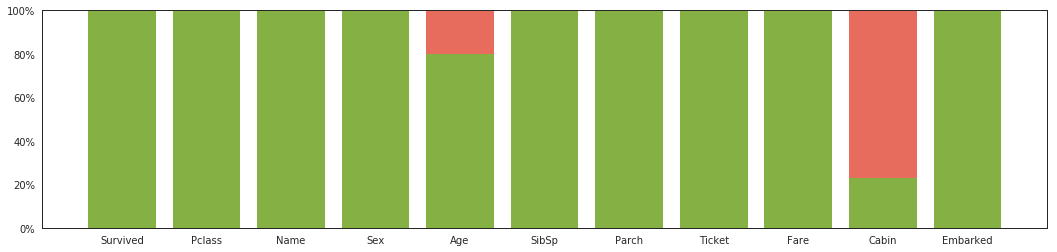

In [139]:
plot_missing_values(train_df)

#### Test set

In [140]:
test_df.isnull().sum().to_frame('Missing values').transpose()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Missing values,0,0,0,86,0,0,0,1,327,0


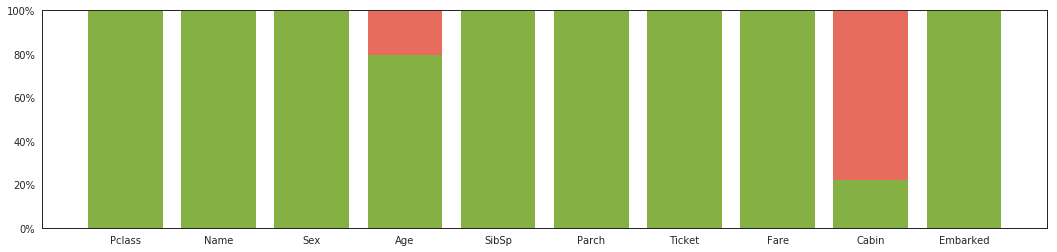

In [141]:
plot_missing_values(test_df)

`Age` and `Cabin` have quite a lot of missing values in both datasets, we will have to deal with those later.

### 3.5 Exploring numerical features
Let's plot the **Pearson's correlation matrix** of the raw numerical features to get a sense of linear correlations between them.

The coefficients of the matrix for variables $X$ and $Y$ are computed as follows:

$$\rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}={\frac {\operatorname {E} [(X-\mu _{X})(Y-\mu _{Y})]}{\sigma _{X}\sigma _{Y}}}$$

It means that variables show a strong linear correlation if the absolute value of the coefficient is close to one.

Text(0.5,1,"Pearson's correlation matrix of test set")

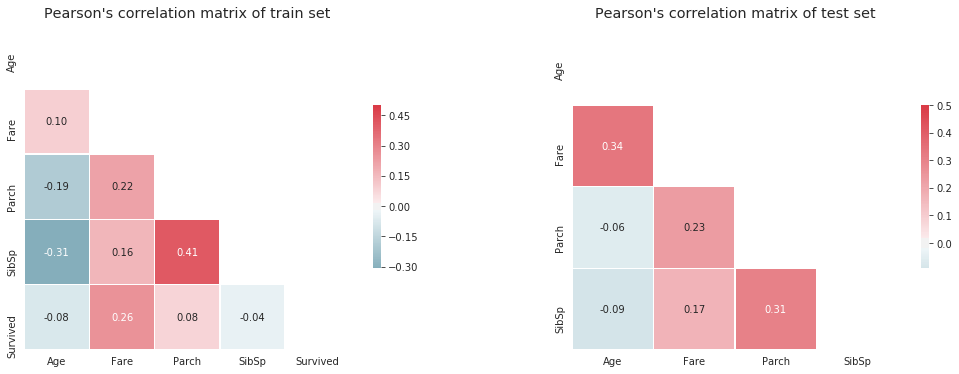

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

corr_train = train_df[['Age', 'Fare', 'Parch', 'SibSp', 'Survived']].corr()
corr_test = test_df[['Age', 'Fare', 'Parch', 'SibSp']].corr()

# Generate masks for the upper triangles
mask_train = np.zeros_like(corr_train, dtype=np.bool)
mask_train[np.triu_indices_from(mask_train)] = True

mask_test = np.zeros_like(corr_test, dtype=np.bool)
mask_test[np.triu_indices_from(mask_test)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the train set heatmap with the mask and correct aspect ratio
sns.heatmap(corr_train, ax=ax1, mask=mask_train, cmap=cmap, vmax=.5, center=0, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')
ax1.set_title('Pearson\'s correlation matrix of train set')

# Draw the test heatmap with the mask and correct aspect ratio
sns.heatmap(corr_test, ax=ax2, mask=mask_test, cmap=cmap, vmax=.5, center=0, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')
ax2.set_title('Pearson\'s correlation matrix of test set')

Three remarks:
* it seems that `Fare` has the strongest linear correlation with `Survived`, making it a strong feature ;
* `Parch` and `SibSp` show a potentially strong linear correlation, it might be a good idea to combine those features ;
* except with `Fare`, the `Age` feature shows different correlation coefficients between the train set and the test set.

Because of that last remark, we will try to get more insights by computing the **Jensen-Shannon divergence** between the distributions of the train set and the test set. It is a measure of similarity between two probability distributions based on the **Kullback-Leibler divergence** well-known in information theory.

It is defined as:

$${{\rm {JSD}}}(P\parallel Q)={\frac  {1}{2}}D_{\mathrm {KL}}(P\parallel M)+{\frac  {1}{2}}D_{\mathrm {KL}}(Q\parallel M)$$

where $M={\frac  {1}{2}}(P+Q)$ and $D_{\mathrm {KL}}$ is the KL divergence.

In [143]:
from scipy.stats import entropy
from numpy.linalg import norm

def JSD(P, Q, n_iter=1000):
    """
        Computes the Jensen-Shannon divergence between two probability distributions of different sizes.
        
        :param P: distribution P
        :param Q: distribution Q
        :param n_iter: number of iterations
        :return: Jensen-Shannon divergence
    """
    size = min(len(P),len(Q))
    
    results = []
    for _ in range(n_iter):
        P = np.random.choice(P, size=size, replace=False)
        Q = np.random.choice(Q, size=size, replace=False)

        _P = P / norm(P, ord=1)
        _Q = Q / norm(Q, ord=1)
        _M = 0.5 * (_P + _Q)

        results.append(0.5 * (entropy(_P, _M) + entropy(_Q, _M)))

    return results

### Univariate analysis
Let's first analyze features individually.

#### Age

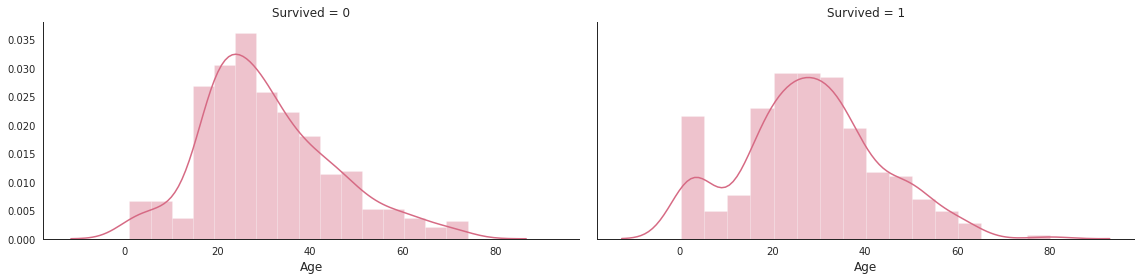

In [144]:
# Age vs Survived
g = sns.FacetGrid(train_df, col='Survived', size=4, aspect=2)
g = g.map(sns.distplot, 'Age', color='#D66A84')

Even though it just looks like sums of Gaussian distributions, we can clearly observe the impact of `Age` on `Survival` with *very young passengers* and *probably parents passengers* having more chance to survive. (remember that about 20% of the data is missing)

Let's now see how the test set is distributed compared to the train set.

Text(0.5,1,'Test set')

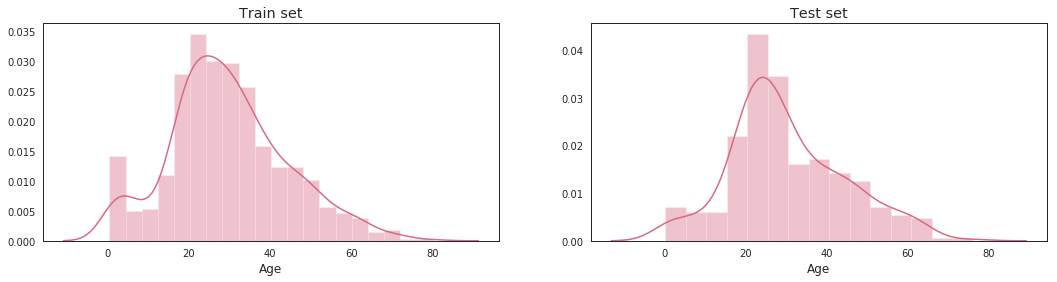

In [145]:
# Train set vs Test set
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(train_df['Age'].dropna(), ax=ax1, color='#D66A84')
ax1.set_title('Train set')

sns.distplot(test_df['Age'].dropna(), ax=ax2, color='#D66A84')
ax2.set_title('Test set')

We see that the `Age` feature alone won't be of great help predicting survival on the test set since most of it is composed of 20-30 years passengers which is a range 50/50 chance of survival.

Let's compute the JS divergence for `Age`, we will compare this value later with other features.

In [146]:
age_jsd = JSD(train_df['Age'].dropna().values, test_df['Age'].dropna().values)
print('Jensen-Shannon divergence of Age:', np.mean(age_jsd))
print('Standard deviation:', np.std(age_jsd))

Jensen-Shannon divergence of Age: 0.060653795648424755
Standard deviation: 0.003199510522683717


**Conclusion:** to use `Age`, we will have to impute 20% missing data (not that easy), create bins to avoid overfitting and/or mix it with other features.

#### Fare

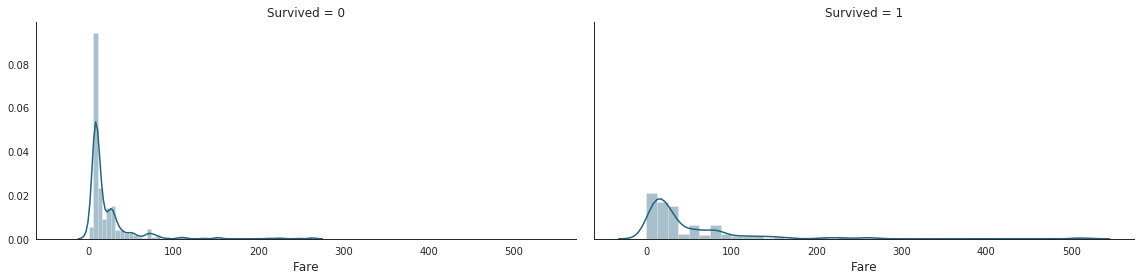

In [147]:
# Fare vs Survived
g = sns.FacetGrid(train_df, col='Survived', palette=palette, size=4, aspect=2)
g = g.map(sns.distplot, 'Fare', color='#25627D')

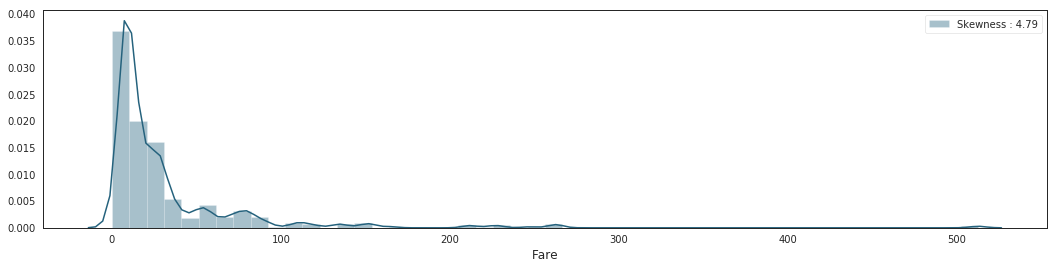

In [148]:
fig, ax = plt.subplots(figsize=(18,4))

g = sns.distplot(train_df['Fare'], ax=ax, color='#25627D', label='Skewness : %.2f'%(train_df['Fare'].skew()))
g = g.legend(loc='best')

The `Fare` feature is right-skewed, if we want to make discriminant bins we'll have to address this concern later.

The skewness of a random variable $X$ is the third standardized moment $\gamma _{1}$, defined as:

$${\displaystyle \gamma _{1}=\operatorname {E} \left[\left({\frac {X-\mu }{\sigma }}\right)^{3}\right]={\frac {\mu _{3}}{\sigma ^{3}}}={\frac {\operatorname {E} \left[(X-\mu )^{3}\right]}{\ \ \ (\operatorname {E} \left[(X-\mu )^{2}\right])^{3/2}}}={\frac {\kappa _{3}}{\kappa _{2}^{3/2}}}}$$

Let's now see how the test set is distributed compared to the train set.

Text(0.5,1,'Test set')

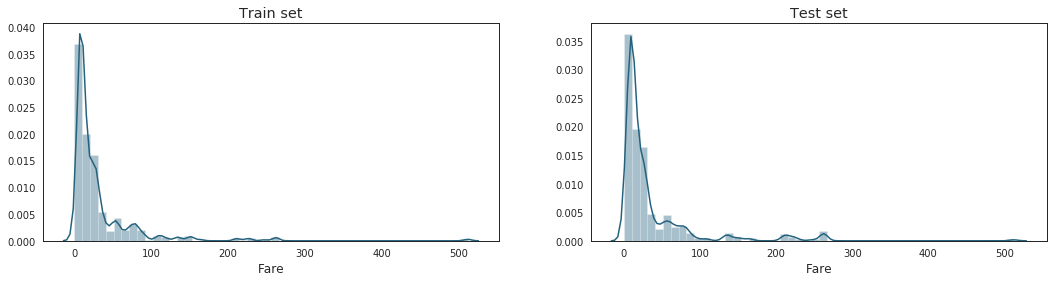

In [149]:
# Train set vs Test set
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(train_df['Fare'].dropna(), ax=ax1, color='#25627D')
ax1.set_title('Train set')

sns.distplot(test_df['Fare'].dropna(), ax=ax2, color='#25627D')
ax2.set_title('Test set')

`Fare` looks almost evenly distributed between the train set and the test set.

Let's compute the JS divergence for `Fare`, we will compare this value later with other features.

In [150]:
fare_jsd = JSD(train_df['Fare'].dropna().values, test_df['Fare'].dropna().values)
print('Jensen-Shannon divergence of Fare:', np.mean(fare_jsd))
print('Standard deviation:', np.std(fare_jsd))

Jensen-Shannon divergence of Fare: 0.2578071229634465
Standard deviation: 0.011328994711732742


**Conclusion:** to use `Fare`, we will have to impute 1 missing value, fix the tailed distribution and create bins to avoid overfitting and/or mix it with other features.

#### Parch

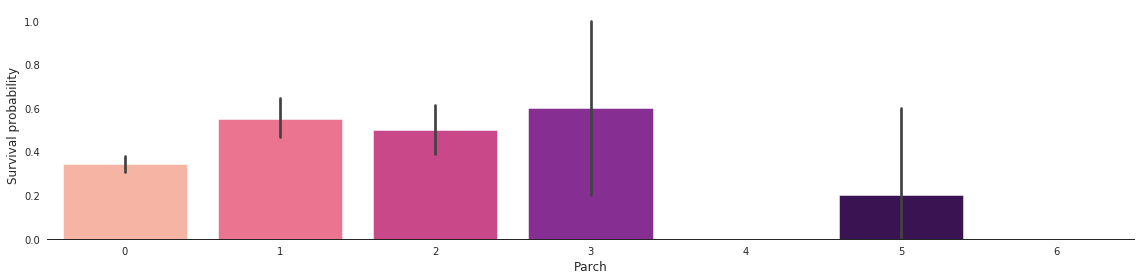

In [151]:
palette6 = ["#F6B5A4", "#EB7590", "#C8488A", "#872E93", "#581D7F", "#3A1353"]
# Parch vs Survived
g  = sns.factorplot(x='Parch', y='Survived', saturation=5, size=4, aspect=4, data=train_df, kind='bar', palette=palette6)
g.despine(left=True)
g = g.set_ylabels("Survival probability")

At first glance, we can say that if passengers happened to have a relatively small family on the Titanic, they were more likely to survive. We have to stay careful though because 3 and 5 have high standard deviations.

Let's now see how the test set is distributed compared to the training set.

Text(0.5,1,'Test set')

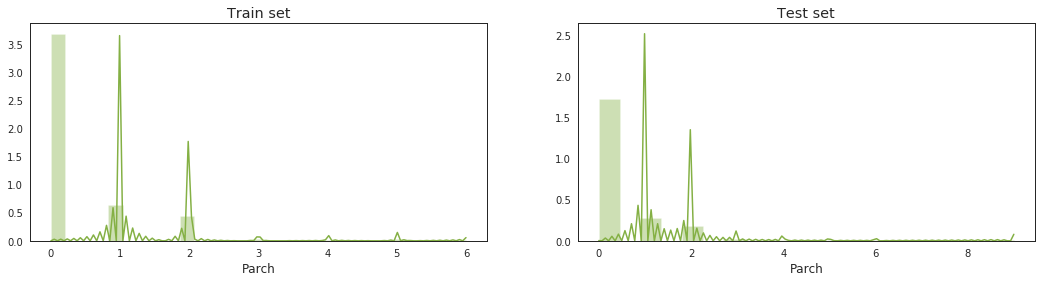

In [152]:
# Train set vs Test set
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(train_df['Parch'], ax=ax1, color='#84B044')
ax1.set_title('Train set')

sns.distplot(test_df['Parch'], ax=ax2, color='#84B044')
ax2.set_title('Test set')

`Parch` looks like it is evenly distributed between both sets but it is quite not the case.

Let's compute the JS divergence for `Parch`, we will compare this value later with other features.

In [153]:
parch_jsd = JSD(train_df['Parch'].values, test_df['Parch'].values)
print('Jensen-Shannon divergence of Parch:', np.mean(parch_jsd))
print('Standard deviation:', np.std(parch_jsd))

Jensen-Shannon divergence of Parch: 0.5528399408796562
Standard deviation: 0.025532273240964208


**Conclusion:** we can use `Parch` as is or mix it with other features.

#### SibSp

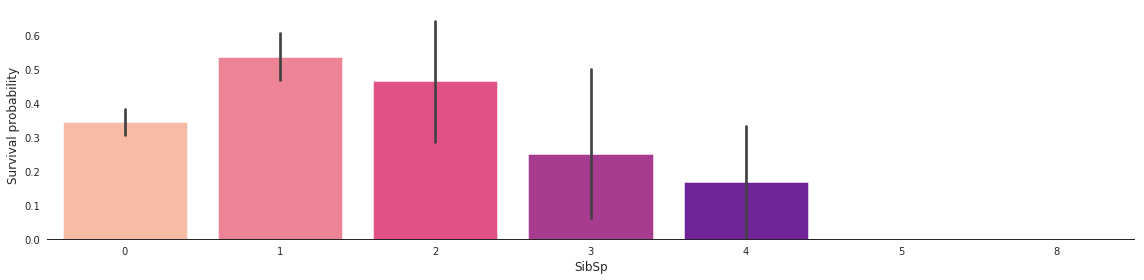

In [154]:
palette7 = ["#F7BBA6", "#ED8495", "#E05286", "#A73B8F", "#6F2597", "#511B75", "#37114E"]
# SibSp feature vs Survived
g = sns.factorplot(x='SibSp', y='Survived', saturation=5, size=4, aspect=4, data=train_df, kind='bar', palette=palette7)
g.despine(left=True)
g = g.set_ylabels("Survival probability")

It seems that single passengers or with two other persons had more chance to survive.

Let's now see how the test set is distributed compared to the training set.

Text(0.5,1,'Test set')

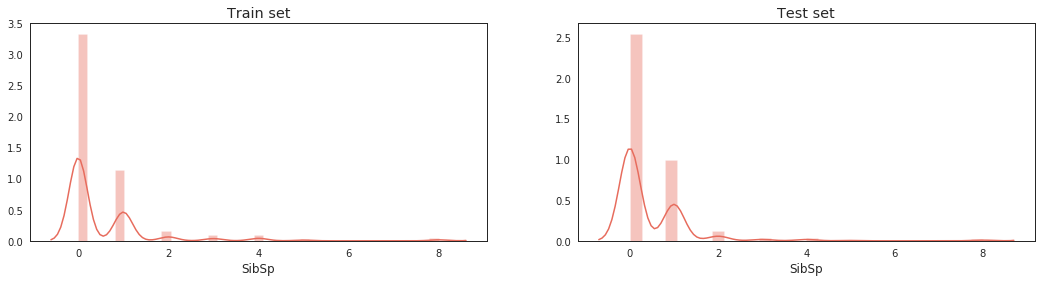

In [155]:
# Train set vs Test set
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(train_df['SibSp'], ax=ax1, color='#E76C5D')
ax1.set_title('Train set')

sns.distplot(test_df['SibSp'], ax=ax2, color='#E76C5D')
ax2.set_title('Test set')

`SibSp` looks like it is evenly distributed between both sets but it is quite not the case.

Let's compute the JS divergence for `SibSp`, we will compare this value later with other features.

In [156]:
sibsp_jsd = JSD(train_df['SibSp'].values, test_df['SibSp'].values)
print('Jensen-Shannon divergence of SibSp:', np.mean(sibsp_jsd))
print('Standard deviation:', np.std(sibsp_jsd))

Jensen-Shannon divergence of SibSp: 0.495643179842729
Standard deviation: 0.022343478332026073


**Conclusion:** we can use `SibSp` as is or mix it with other features.

#### Differences between the distributions of the train set and the test set
By looking at the JS divergence, we can tell how the distributions of invidual features differ. Keep in mind that it is ok to observe some divergence.

Text(0.5,1,'Jensen-Shannon divergences of numerical features')

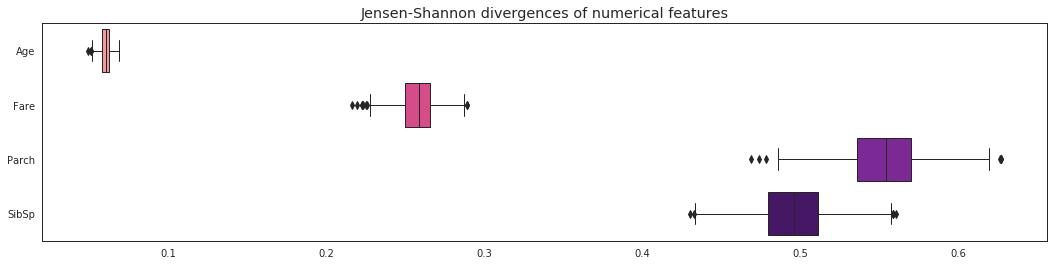

In [157]:
palette4 = ["#F19A9B", "#D54D88", "#7B2A95", "#461765"]
fig, ax = plt.subplots(figsize=(18,4))
jsd = pd.DataFrame(np.column_stack([age_jsd, fare_jsd, parch_jsd, sibsp_jsd]), columns=['Age', 'Fare', 'Parch', 'SibSp'])
sns.boxplot(data=jsd, ax=ax, orient="h", linewidth=1, saturation=5, palette=palette4)
ax.set_title('Jensen-Shannon divergences of numerical features')

### Bivariate analysis
Let's then see if there is an impact of a feature on another.

#### Age vs Fare

Text(0.5,1,'Age vs Fare')

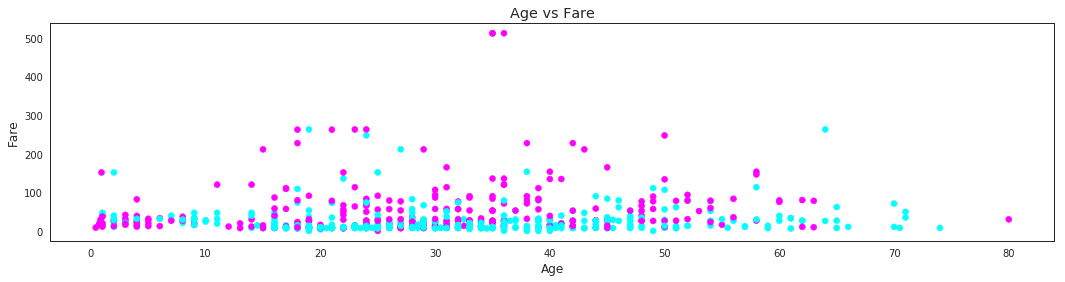

In [158]:
plt.figure(figsize=(18, 4))
plt.scatter(train_df['Age'], train_df['Fare'], c=train_df['Survived'].values, cmap='cool')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')

Text(0.5,1,'Test set')

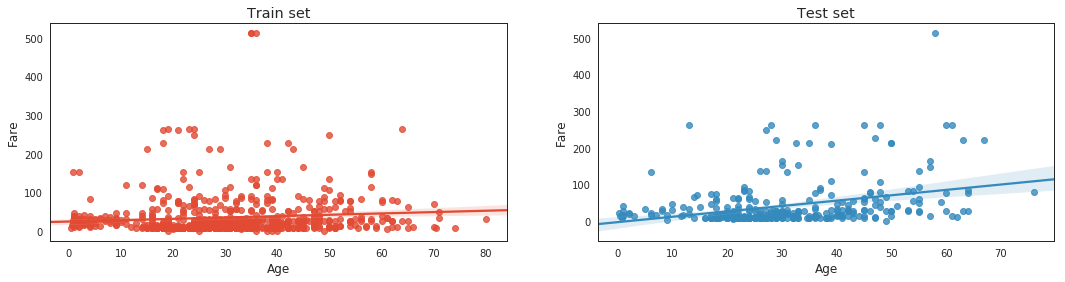

In [159]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.regplot(x='Age', y='Fare', ax=ax1, data=train_df)
ax1.set_title('Train set')
sns.regplot(x='Age', y='Fare', ax=ax2, data=test_df)
ax2.set_title('Test set')

In [160]:
print('PCC for the train set: ', corr_train['Age']['Fare'])
print('PCC for the test set: ', corr_test['Age']['Fare'])

PCC for the train set:  0.09606669176903881
PCC for the test set:  0.3379315845519921


**Conclusion:** `Age` and `Fare` tend to be much more linearly correlated on the test set than on the train set. (remember that the `Fare` distribution is skewed though.

#### Age vs Parch

Text(0.5,1,'Age vs Parch')

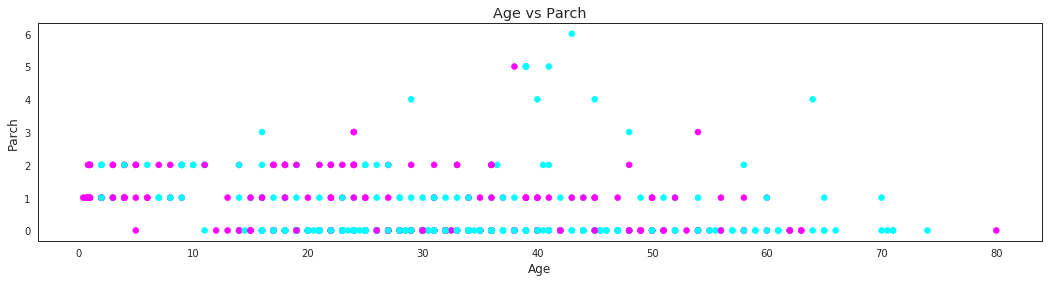

In [161]:
plt.figure(figsize=(18, 4))
plt.scatter(train_df['Age'], train_df['Parch'], c=train_df['Survived'].values, cmap='cool')
plt.xlabel('Age')
plt.ylabel('Parch')
plt.title('Age vs Parch')

Text(0.5,1,'Test set')

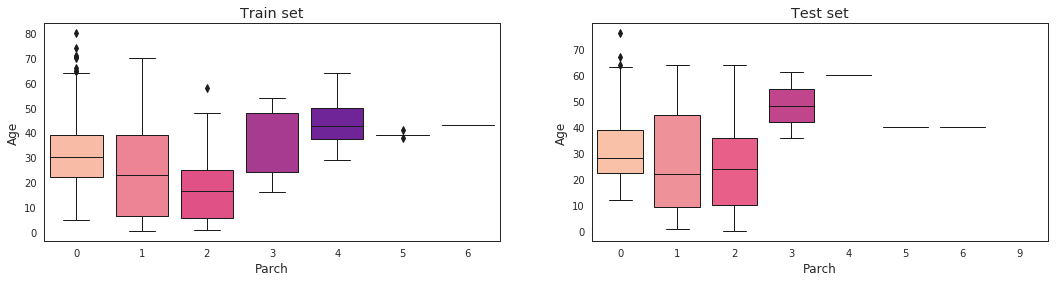

In [162]:
palette8 = ["#F8C1A8", "#EF9198", "#E8608A", "#C0458A", "#8F3192", "#63218F", "#4B186C", "#33104A"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(y='Age', x='Parch', ax=ax1, data=train_df, linewidth=1, saturation=5, palette=palette7)
ax1.set_title('Train set')
sns.boxplot(y='Age', x='Parch', ax=ax2, data=test_df, linewidth=1, saturation=5, palette=palette8)
ax2.set_title('Test set')

In [163]:
print('PCC for the train set: ', corr_train['Age']['Parch'])
print('PCC for the test set: ', corr_test['Age']['Parch'])

PCC for the train set:  -0.18911926263203518
PCC for the test set:  -0.06124863292998427


**Conclusion:** there are noticeable differences on the distributions of those features between the train set and the test set. It can be stabilized by making age bins though.

#### Fare vs Parch

Text(0.5,1,'Fare vs Parch')

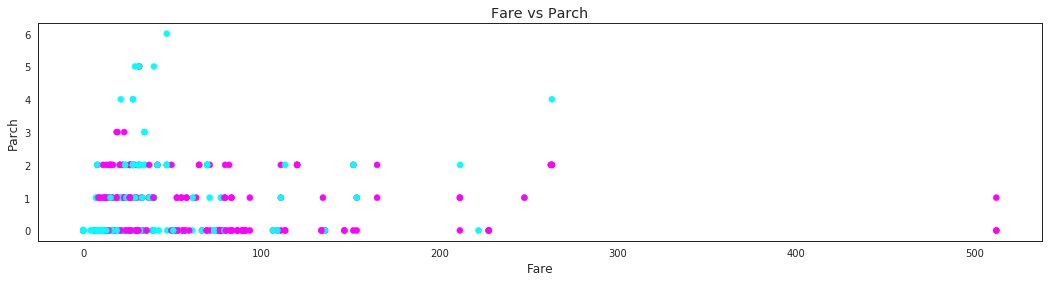

In [164]:
plt.figure(figsize=(18, 4))
plt.scatter(train_df['Fare'], train_df['Parch'], c=train_df['Survived'].values, cmap='cool')
plt.xlabel('Fare')
plt.ylabel('Parch')
plt.title('Fare vs Parch')

Text(0.5,1,'Test set')

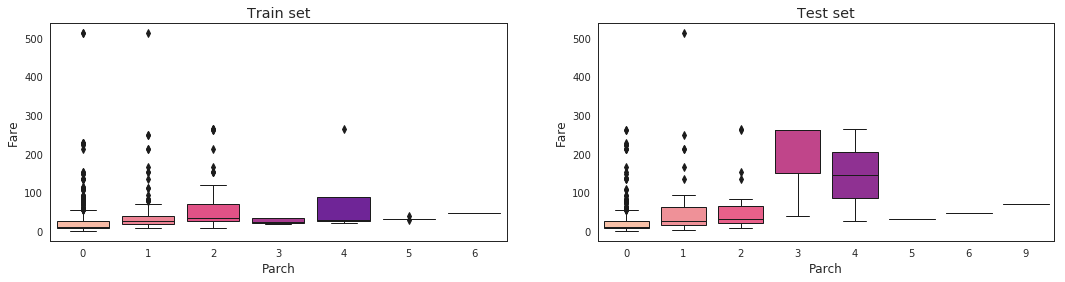

In [165]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(y='Fare', x='Parch', ax=ax1, data=train_df, linewidth=1, saturation=5, palette=palette7)
ax1.set_title('Train set')
sns.boxplot(y='Fare', x='Parch', ax=ax2, data=test_df, linewidth=1, saturation=5, palette=palette8)
ax2.set_title('Test set')

In [166]:
print('PCC for the train set: ', corr_train['Fare']['Parch'])
print('PCC for the test set: ', corr_test['Fare']['Parch'])

PCC for the train set:  0.21622494477076254
PCC for the test set:  0.23004554639044777


**Conclusion:** although they have similar correlation coefficients, distributions differ between both sets.

#### Fare vs SibSp

Text(0.5,1,'Fare vs SibSp')

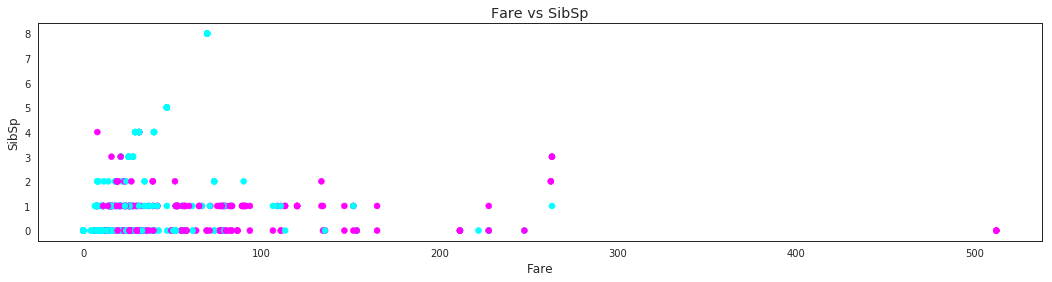

In [167]:
plt.figure(figsize=(18, 4))
plt.scatter(train_df['Fare'], train_df['SibSp'], c=train_df['Survived'].values, cmap='cool')
plt.xlabel('Fare')
plt.ylabel('SibSp')
plt.title('Fare vs SibSp')

Text(0.5,1,'Test set')

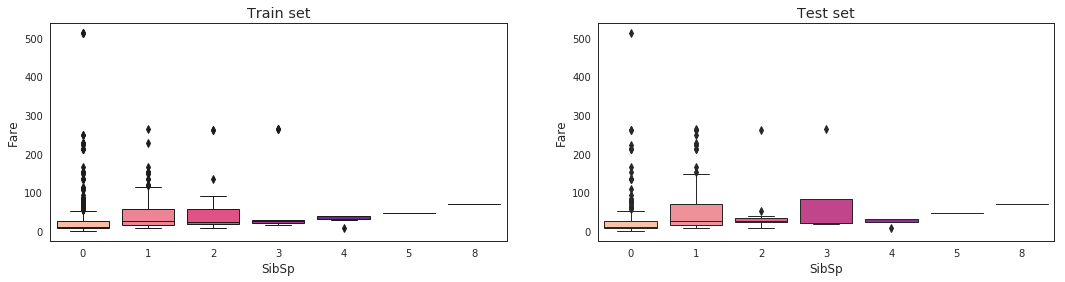

In [168]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(y='Fare', x='SibSp', ax=ax1, data=train_df, linewidth=1, saturation=5, palette=palette7)
ax1.set_title('Train set')
sns.boxplot(y='Fare', x='SibSp', ax=ax2, data=test_df, linewidth=1, saturation=5, palette=palette8)
ax2.set_title('Test set')

In [169]:
print('PCC for the train set: ', corr_train['Fare']['SibSp'])
print('PCC for the test set: ', corr_test['Fare']['SibSp'])

PCC for the train set:  0.15965104324216103
PCC for the test set:  0.1715391333652467


**Conclusion:** although they have similar correlation coefficients, distributions differ between both sets.

#### Parch vs SibSp

Text(0.5,1,'Parch vs SibSp')

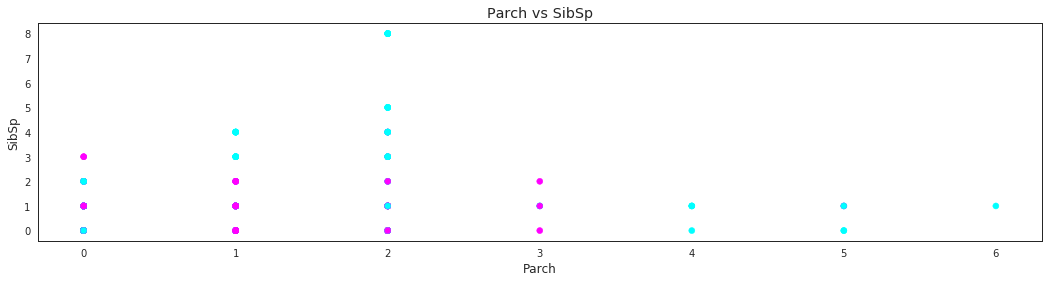

In [170]:
plt.figure(figsize=(18, 4))
plt.scatter(train_df['Parch'], train_df['SibSp'], c=train_df['Survived'].values, cmap='cool')
plt.xlabel('Parch')
plt.ylabel('SibSp')
plt.title('Parch vs SibSp')

Text(0.5,1,'Test set')

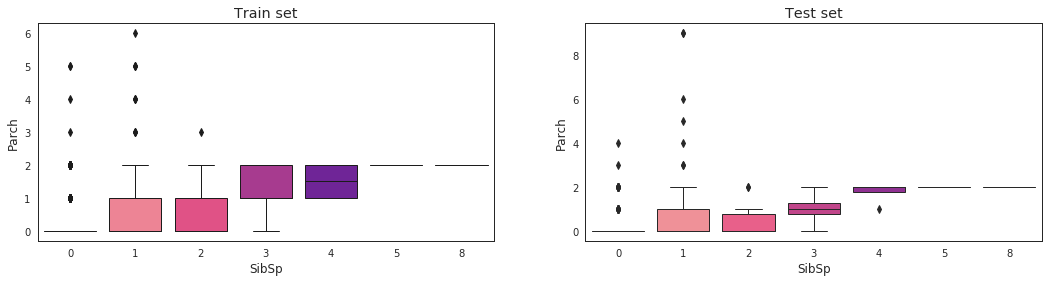

In [171]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(y='Parch', x='SibSp', ax=ax1, data=train_df, linewidth=1, saturation=5, palette=palette7)
ax1.set_title('Train set')
sns.boxplot(y='Parch', x='SibSp', ax=ax2, data=test_df, linewidth=1, saturation=5, palette=palette8)
ax2.set_title('Test set')

In [172]:
print('PCC for the train set: ', corr_train['Parch']['SibSp'])
print('PCC for the test set: ', corr_test['Parch']['SibSp'])

PCC for the train set:  0.41483769862015263
PCC for the test set:  0.30689461547590147


**Conclusion:** distributions look quite the same with strong correlation coefficients, we will combine them later.

### 3.6 Exploring categorical features

### Univariate analysis

Let's first analyze features individually.

#### Embarked

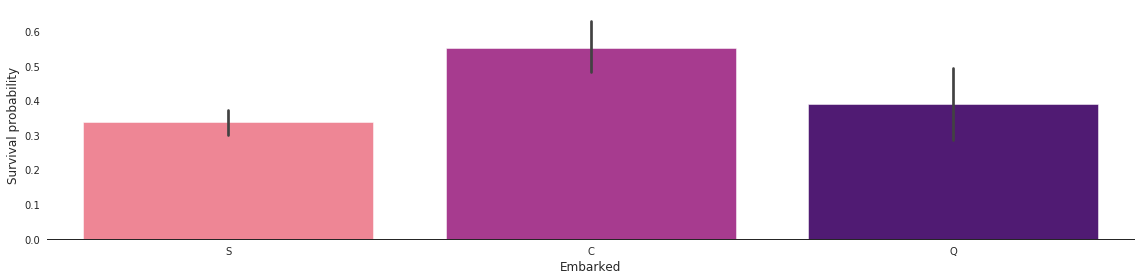

In [173]:
palette3 = ["#EE8695", "#A73B8F", "#501B73"]
# Embarked feature vs Survived
g  = sns.catplot(x='Embarked', y='Survived', saturation=5, height=4, aspect=4, data=train_df, 
                    kind='bar', palette=palette3)
g.despine(left=True)
g = g.set_ylabels('Survival probability')

It's curious how an embarkment has an influence on `Survival`, this must be related to another feature and we'll dive in with bivariate analysis.

Text(0.5,1,'Test set')

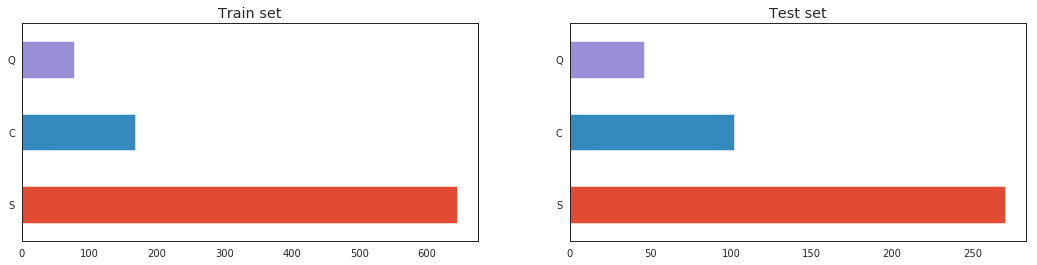

In [174]:
# Train set vs Test set
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

train_df['Embarked'].value_counts().plot(kind='barh', ax=ax1)
ax1.set_title('Train set')

test_df['Embarked'].value_counts().plot(kind='barh', ax=ax2)
ax2.set_title('Test set')

Quite similar distributions between the train set and the test set as we can see.

**Conclusion:** we can use `Embarked` as is or mix it with other features.

#### Sex
Everyone watched *Titanic*, we all know that women were more likely to survive this disaster.

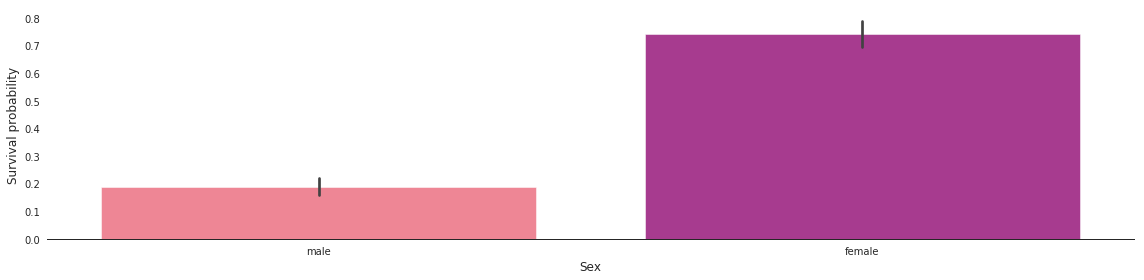

In [175]:
palette2 = ["#EE8695", "#A73B8F"]
# Sex feature vs Survived
g  = sns.catplot(x='Sex', y='Survived', saturation=5, height=4, aspect=4, data=train_df, 
                    kind='bar', palette=palette2)
g.despine(left=True)
g = g.set_ylabels('Survival probability')

Text(0.5,1,'Test set')

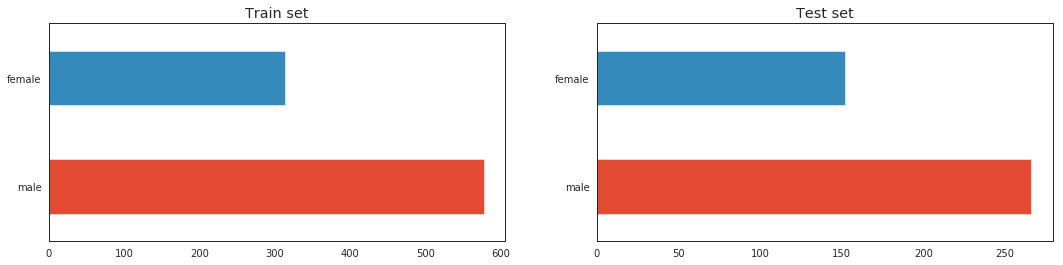

In [176]:
# Train set vs Test set
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

train_df['Sex'].value_counts().plot(kind='barh', ax=ax1)
ax1.set_title('Train set')

test_df['Sex'].value_counts().plot(kind='barh', ax=ax2)
ax2.set_title('Test set')

Quite similar distributions between the train set and the test set as we can see.

**Conclusion:** we can use `Sex` as is or mix it with other features.

#### Pclass

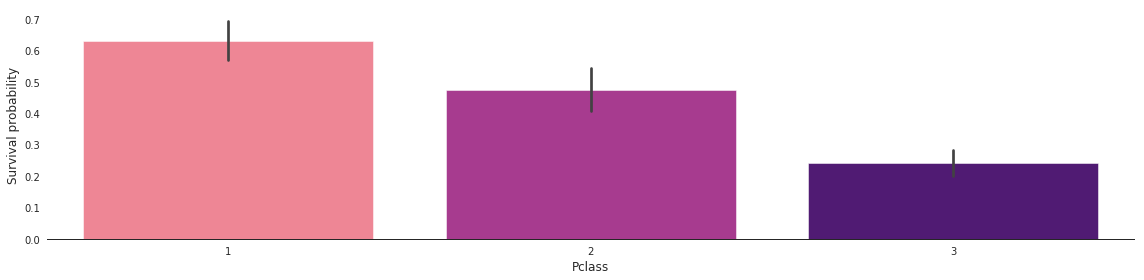

In [177]:
# Pclass feature vs Survived
g  = sns.catplot(x='Pclass', y='Survived', saturation=5, height=4, aspect=4, data=train_df, 
                    kind='bar', palette=palette3)
g.despine(left=True)
g = g.set_ylabels('Survival probability')

Wealthier passengers had more influence on the Titanic, it appears that they were more likely to find a place on a lifeboat.

Text(0.5,1,'Test set')

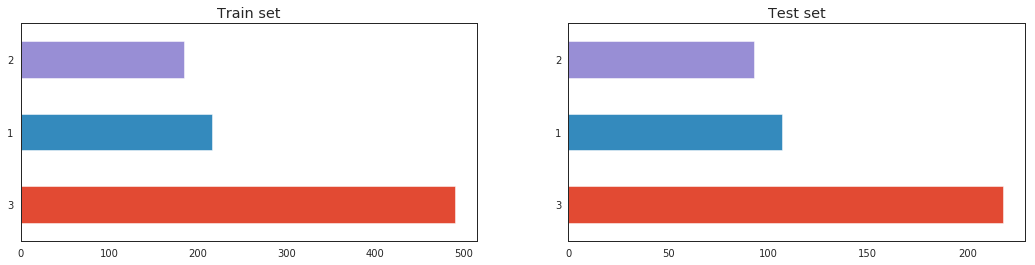

In [178]:
# Train set vs Test set
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

train_df['Pclass'].value_counts().plot(kind='barh', ax=ax1)
ax1.set_title('Train set')

test_df['Pclass'].value_counts().plot(kind='barh', ax=ax2)
ax2.set_title('Test set')

Quite similar distributions between the train set and the test set as we can see.

**Conclusion:** we can use `Pclass` as is or mix it with other features.

### Bivariate analysis
Let's then see if there is an impact of a feature on another.

#### Continuous and categorical variables

When dealing with continuous and categorical variables, we can look at statistical significance through variance analysis (**ANOVA**).

If we denote by $k_i$ the ith value for the continuous variable in the group, $n$ the number of passengers in each group, $T$ the sum of the continuous variable's values for all passengers and $N$ the number of passengers ; we can define $SS_{between}$ the *Sum of Squares Between*:

$$SS_{between} = \frac{\sum(\sum k_i)²}{n} - \frac{T²}{N}$$

If we denote by $Y$ a value of the continuous variable ; we can define $SS_{total}$ the *Sum of Squares Total*:

$$SS_{total} = \sum Y² - \frac{T²}{N}$$

We then have access to the *effect size* $\eta²$ which tells us how much the group has influenced the variable:

$$\eta² = \frac{SS_{between}}{SS_{total}}$$

For the value of $\eta²$, we will refer to *Cohen's d* guidelines which are as follows:
* Small effect: 0.01
* Medium effect: 0.059
* Large effect: 0.138

In [179]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def compute_anova(dataset, group, weight):
    """
        Computes the effect size through ANOVA.
        
        :param dataset: pandas DataFrame
        :param group: categorical feature
        :param weight: continuous feature
        :return: effect size
    """
    mod = ols(weight + ' ~ ' + group, data=dataset).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    
    return esq_sm

#### Continuous and continuous variables
When dealing with two continuous variables, we can look at statistical independence through the $\chi^2$ test. 

In its general statement, if there are $r$ rows and $c$ columns in the dataset, the *theoretical frequency* for a value, given the hypothesis of independence, is:

$$E_{{i,j}}=Np_{{i\cdot }}p_{{\cdot j}}$$

where $N$ is the total sample size, and:

$$p_{{i\cdot }}={\frac  {O_{{i\cdot }}}{N}}=\sum _{{j=1}}^{c}{\frac  {O_{{i,j}}}{N}}$$

is the fraction of observations of type $i$ ignoring the column attribute, and:

$${\displaystyle p_{\cdot j}={\frac {O_{\cdot j}}{N}}=\sum _{i=1}^{r}{\frac {O_{i,j}}{N}}}$$

is the fraction of observations of type $j$ ignoring the row attribute. The term *frequencies* refers to absolute numbers rather than already normalised values.

The value of the test-statistic is:

$$\chi ^{2}=\sum _{{i=1}}^{{r}}\sum _{{j=1}}^{{c}}{(O_{{i,j}}-E_{{i,j}})^{2} \over E_{{i,j}}} = N\sum _{{i,j}}p_{{i\cdot }}p_{{\cdot j}}\left({\frac  {(O_{{i,j}}/N)-p_{{i\cdot }}p_{{\cdot j}}}{p_{{i\cdot }}p_{{\cdot j}}}}\right)^{2}$$

The null hypothesis $H_0$ is that the two variables are independent. We will then also look at the *p-value*. ($H_0$ rejected if $p \leq 0.05$)

In [180]:
from scipy.stats import chi2_contingency

def chisq(dataset, c1, c2):
    """
        Performs the Chi squared independence test.
        
        :param dataset: pandas DataFrame
        :param c1: continuous feature 1
        :param c2: continuous feature 2
        :return: array with [Chi^2, p-value]
    """
    groupsizes = dataset.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)

    result = chi2_contingency(ctsum.fillna(0))
    
    print('Chi^2:', result[0])
    print('p-value:', result[1])
    print('Degrees of freedom:', result[2])

#### Embarked vs Age

Text(0.5,1,'Test set')

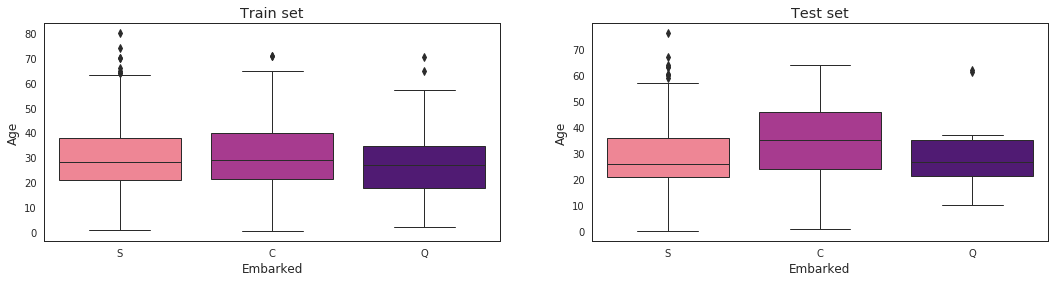

In [181]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(y='Age', x='Embarked', ax=ax1, data=train_df, linewidth=1, saturation=5, order=['S', 'C', 'Q'], palette=palette3)
ax1.set_title('Train set')
sns.boxplot(y='Age', x='Embarked', ax=ax2, data=test_df, linewidth=1, saturation=5, order=['S', 'C', 'Q'], palette=palette3)
ax2.set_title('Test set')

In [182]:
train_esq_sm = compute_anova(train_df, 'Embarked', 'Age')
test_esq_sm = compute_anova(test_df, 'Embarked', 'Age')

print('ANOVA 1-way for the train set: ', train_esq_sm)
print('ANOVA 1-way for the test set: ', test_esq_sm)

ANOVA 1-way for the train set:  0.0017926615874587588
ANOVA 1-way for the test set:  0.03271117750248119


For the **train set**, the effect of `Embarked` on `Age` is **low** (0.0019).

For the **test set**, the effect of `Embarked` on `Age` is **low/medium** (0.0327).

**Conclusion:** the effect of `Embarked` on `Age` differs for about **3%** between the two sets.

#### Embarked vs Fare

Text(0.5,1,'Test set')

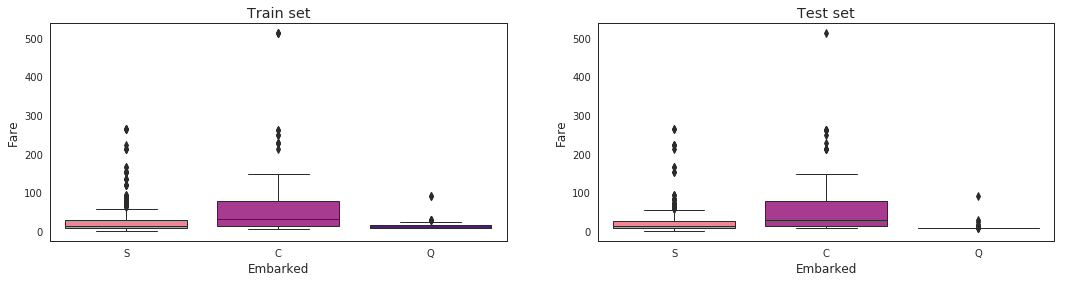

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(y='Fare', x='Embarked', ax=ax1, data=train_df, linewidth=1, saturation=5, order=['S', 'C', 'Q'], palette=palette3)
ax1.set_title('Train set')
sns.boxplot(y='Fare', x='Embarked', ax=ax2, data=test_df, linewidth=1, saturation=5, order=['S', 'C', 'Q'], palette=palette3)
ax2.set_title('Test set')

In [184]:
train_esq_sm = compute_anova(train_df, 'Embarked', 'Fare')
test_esq_sm = compute_anova(test_df, 'Embarked', 'Fare')

print('ANOVA 1-way for the train set: ', train_esq_sm)
print('ANOVA 1-way for the test set: ', test_esq_sm)

ANOVA 1-way for the train set:  0.07927065096791154
ANOVA 1-way for the test set:  0.10645803312823172


For the **train set**, the effect of `Embarked` on `Fare` is **medium/high** (0.0823).

For the **test set**, the effect of `Embarked` on `Fare` is **medium/high** (0.1064).

**Conclusion:** the effect of `Embarked` on `Fare` differs for about **2.4%** between the two sets.

#### Embarked vs Parch
Let's first write a quick function to plot the proportion of `Embarked` by another discrete variable.

In [185]:
def plot_embarked_variable(dataset, variable):
    """
        Plots the proportion of variable values per Embarked value of a dataset.
        
        :param dataset: pandas DataFrame
        :param variable: variable to plot
    """
    s_variable_index = dataset.groupby(['Embarked', variable]).size()['S'].index.values
    c_variable_index = dataset.groupby(['Embarked', variable]).size()['C'].index.values
    q_variable_index = dataset.groupby(['Embarked', variable]).size()['Q'].index.values

    index = list(set().union(s_variable_index,c_variable_index,q_variable_index))

    raw_s_variable = dataset.groupby(['Embarked', variable]).size()['S']
    raw_c_variable = dataset.groupby(['Embarked', variable]).size()['C']
    raw_q_variable = dataset.groupby(['Embarked', variable]).size()['Q']

    s_variable = []
    c_variable = []
    q_variable = []

    for i in range(max(index) + 1):
        s_variable.append(raw_s_variable[i] if i in s_variable_index else 0)
        c_variable.append(raw_c_variable[i] if i in c_variable_index else 0)
        q_variable.append(raw_q_variable[i] if i in q_variable_index else 0)

    percent_s_variable = [s_variable[i]/(s_variable[i] + c_variable[i] + q_variable[i]) if i in index else 0 for i in range(max(index) + 1)]
    percent_c_variable = [c_variable[i]/(s_variable[i] + c_variable[i] + q_variable[i]) if i in index else 0 for i in range(max(index) + 1)]
    percent_q_variable = [q_variable[i]/(s_variable[i] + c_variable[i] + q_variable[i]) if i in index else 0 for i in range(max(index) + 1)]

    r = list(range(max(index) + 1))
    bars = [sum(x) for x in zip(percent_s_variable, percent_c_variable)]

    fig, axs = plt.subplots(1,1,figsize=(18,4))
    plt.bar(r, percent_s_variable, color='#08c299')
    plt.bar(r, percent_c_variable, bottom=percent_s_variable, linewidth=0, color='#97de95')
    plt.bar(r, percent_q_variable, bottom=bars, linewidth=0, color='#fce8aa')
    plt.xticks(r, r)
    plt.title('Proportion of Embarked values by ' + variable)
    axs.legend(labels=['S', 'C', 'Q'])
    axs.yaxis.set_major_formatter(PercentFormatter(xmax=1))

Train set:

Chi^2: 16.76888310297822
p-value: 0.1584999191010371
Degrees of freedom: 12


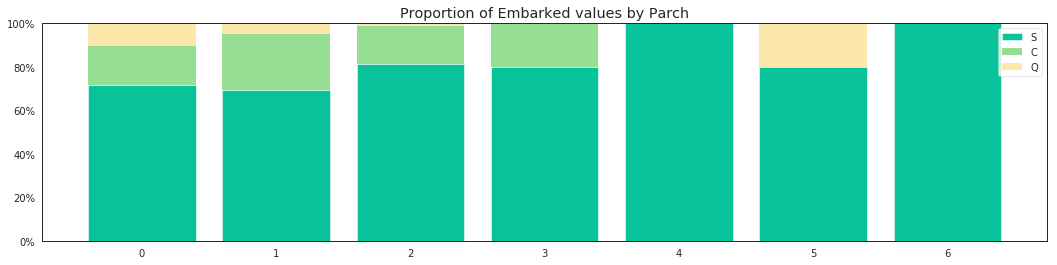

In [186]:
plot_embarked_variable(train_df, 'Parch')
chisq(train_df, 'Embarked', 'Parch')

Test set:

Chi^2: 24.629010910877607
p-value: 0.03841147674970291
Degrees of freedom: 14


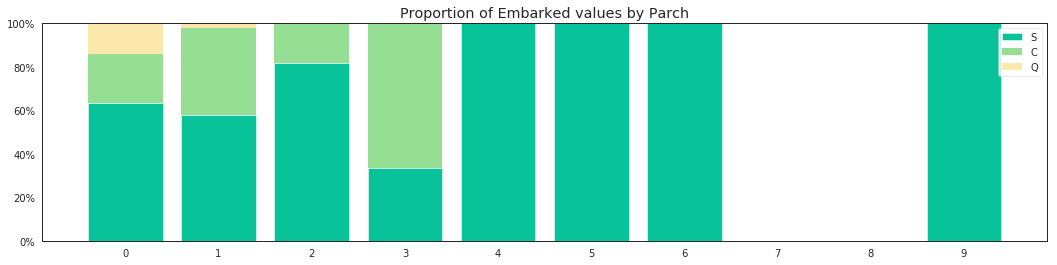

In [187]:
plot_embarked_variable(test_df, 'Parch')
chisq(test_df, 'Embarked', 'Parch')

**Conclusion:** It is worth noticing that `Embarked` and `Parch` **are not** considered independent on the test set but they **are** on the train set.

#### Embarked vs SibSp
Train set:

Chi^2: 27.0090344969443
p-value: 0.0077040872766309
Degrees of freedom: 12


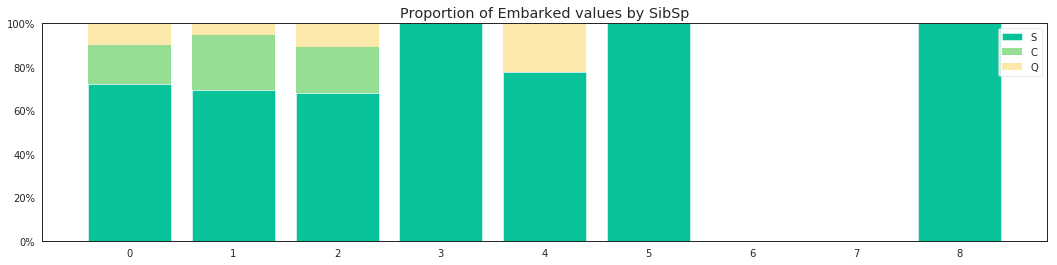

In [188]:
plot_embarked_variable(train_df, 'SibSp')
chisq(train_df, 'Embarked', 'SibSp')

Test set:

Chi^2: 20.525756431863808
p-value: 0.05777143775839417
Degrees of freedom: 12


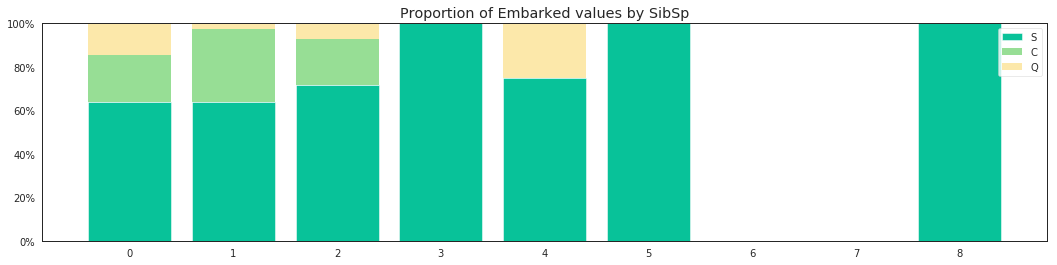

In [189]:
plot_embarked_variable(test_df, 'SibSp')
chisq(test_df, 'Embarked', 'SibSp')

**Conclusion:** `Embarked` and `SibSp` are not considered independent on the train set but they are on the test set.

#### Embarked vs Sex

Chi^2: 13.355630515001742
p-value: 0.001258524523229016
Degrees of freedom: 2


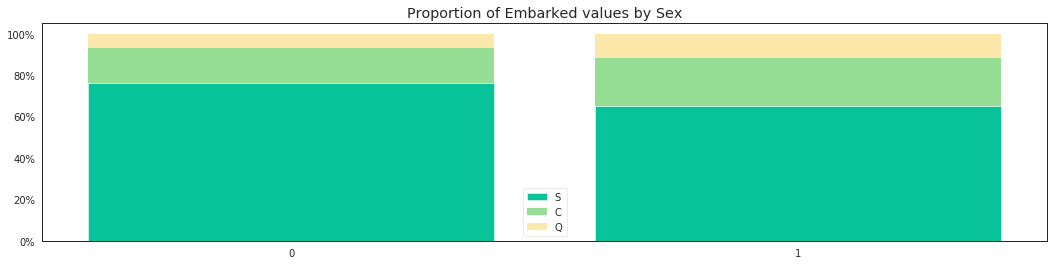

In [190]:
tmp_train_df = train_df.copy(deep=True)
tmp_train_df['Sex'].replace(['male', 'female'], [0,1], inplace=True)
plot_embarked_variable(tmp_train_df, 'Sex')
chisq(tmp_train_df, 'Embarked', 'Sex')

Chi^2: 6.98674677600509
p-value: 0.03039815424608473
Degrees of freedom: 2


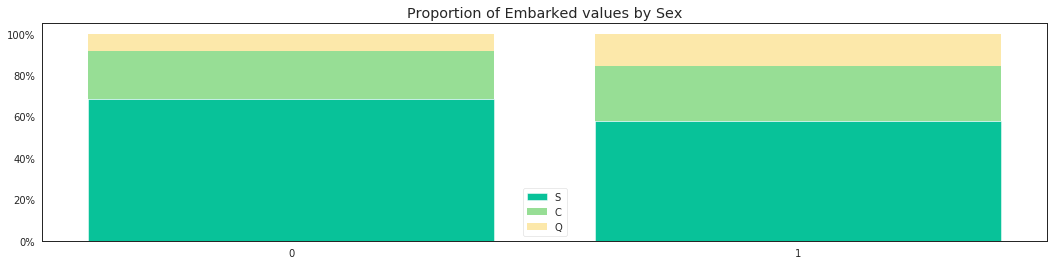

In [191]:
tmp_test_df = test_df.copy(deep=True)
tmp_test_df['Sex'].replace(['male', 'female'], [0,1], inplace=True)
plot_embarked_variable(tmp_test_df, 'Sex')
chisq(tmp_test_df, 'Embarked', 'Sex')

It appears that on both sets, the proportion of male is higher from Southampton (S), thus influencing `Survival`.

**Conclusion:** `Embarked` and `Sex` **are not** considered independent both on the train set and test set.

#### Embarked vs Pclass
Train set:

Chi^2: 123.75190952951289
p-value: 8.435267819894384e-26
Degrees of freedom: 4


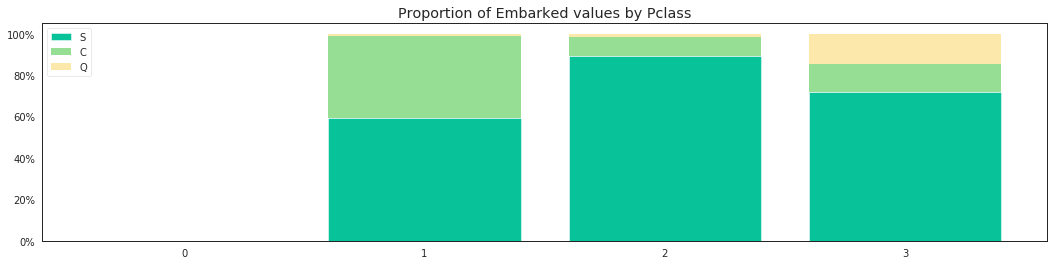

In [192]:
plot_embarked_variable(train_df, 'Pclass')
chisq(train_df, 'Embarked', 'Pclass')

Test set:

Chi^2: 82.83186678873668
p-value: 4.373384811850251e-17
Degrees of freedom: 4


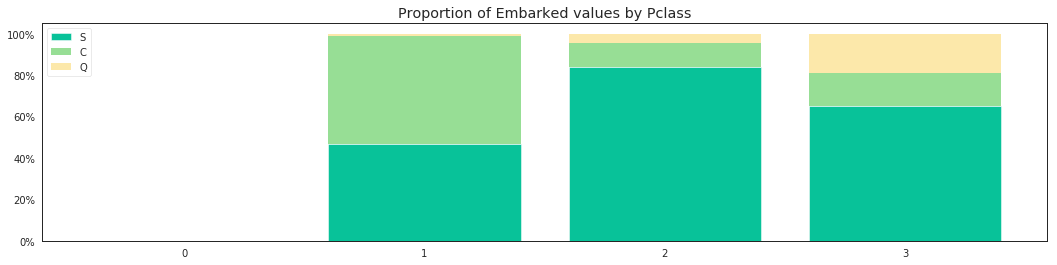

In [193]:
plot_embarked_variable(test_df, 'Pclass')
chisq(test_df, 'Embarked', 'Pclass')

It appears that the proportion of whealthy people is higher from Cherbourg (C), thus influencing `Survival`.

**Conclusion:** `Embarked` and `Pclass` are considered **strongly dependent** both on the train set and test set.

#### Sex vs Age

Text(0.5,1,'Test set')

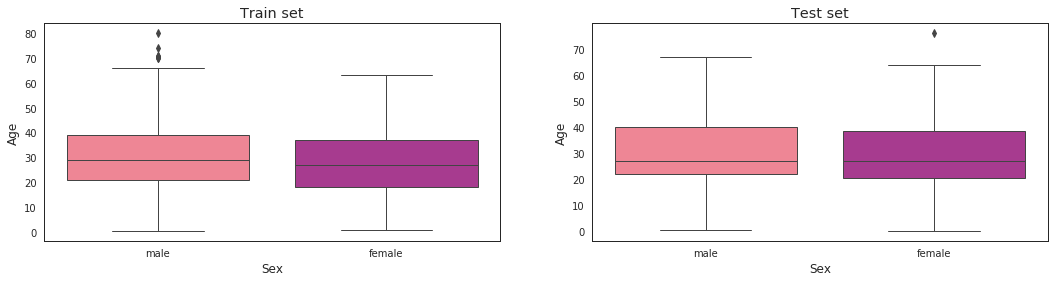

In [194]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(y='Age', x='Sex', ax=ax1, data=train_df, linewidth=1, saturation=5, palette=palette2)
ax1.set_title('Train set')
sns.boxplot(y='Age', x='Sex', ax=ax2, data=test_df, linewidth=1, saturation=5, palette=palette2)
ax2.set_title('Test set')

In [195]:
train_esq_sm = compute_anova(train_df, 'Sex', 'Age')
test_esq_sm = compute_anova(test_df, 'Sex', 'Age')

print('ANOVA 1-way for the train set: ', train_esq_sm)
print('ANOVA 1-way for the test set: ', test_esq_sm)

ANOVA 1-way for the train set:  0.008696229596377761
ANOVA 1-way for the test set:  1.6084218153879174e-10


For the **train set**, the effect of `Sex` on `Age` is **low** (0.0086).

For the **test set**, the effect of `Sex` on `Age` is **low** (1.6084e-10).

**Conclusion:** the effect of `Sex` on `Age` differs for less than **1%** between the two sets.

#### Sex vs Fare

Text(0.5,1,'Test set')

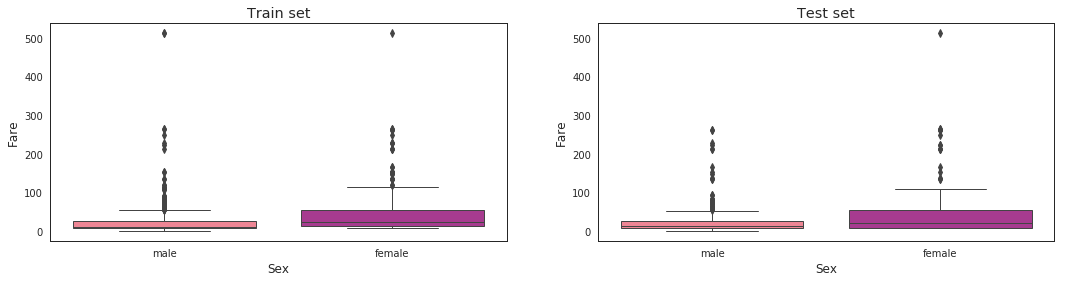

In [196]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(y='Fare', x='Sex', ax=ax1, data=train_df, linewidth=1, saturation=5, palette=palette2)
ax1.set_title('Train set')
sns.boxplot(y='Fare', x='Sex', ax=ax2, data=test_df, linewidth=1, saturation=5, palette=palette2)
ax2.set_title('Test set')

In [197]:
train_esq_sm = compute_anova(train_df, 'Sex', 'Fare')
test_esq_sm = compute_anova(test_df, 'Sex', 'Fare')

print('ANOVA 1-way for the train set: ', train_esq_sm)
print('ANOVA 1-way for the test set: ', test_esq_sm)

ANOVA 1-way for the train set:  0.03324526228258507
ANOVA 1-way for the test set:  0.03667751364048512


For the **train set**, the effect of `Sex` on `Fare` is **low/medium** (0.0332).

For the **test set**, the effect of `Sex` on `Fare` is **low/medium** (0.0367).

**Conclusion:** the effect of `Sex` on `Fare` differs for less than **1%** between the two sets.

#### Sex vs Parch
Let's first write a quick function to plot the proportion of `Sex` by another discrete variable.

In [198]:
def plot_sex_variable(dataset, variable):
    """
        Plots the proportion of variable values per Sex value of a dataset.
        
        :param dataset: pandas DataFrame
        :param variable: variable to plot
    """
    male_variable_index = dataset.groupby(['Sex', variable]).size()['male'].index.values
    female_variable_index = dataset.groupby(['Sex', variable]).size()['female'].index.values

    index = list(set().union(male_variable_index, female_variable_index))

    raw_male_variable = dataset.groupby(['Sex', variable]).size()['male']
    raw_female_variable = dataset.groupby(['Sex', variable]).size()['female']

    male_variable = []
    female_variable = []

    for i in range(max(index) + 1):
        male_variable.append(raw_male_variable[i] if i in male_variable_index else 0)
        female_variable.append(raw_female_variable[i] if i in female_variable_index else 0)

    percent_male_variable = [male_variable[i]/(male_variable[i] + female_variable[i]) if i in index else 0 for i in range(max(index) + 1)]
    percent_female_variable = [female_variable[i]/(male_variable[i] + female_variable[i]) if i in index else 0 for i in range(max(index) + 1)]

    r = list(range(max(index) + 1))

    fig, axs = plt.subplots(1,1,figsize=(18,4))
    plt.bar(r, percent_male_variable, color='#ce2525')
    plt.bar(r, percent_female_variable, bottom=percent_male_variable, linewidth=0, color='#ff6600')
    plt.xticks(r, r)
    plt.title('Proportion of Sex values by ' + variable)
    axs.legend(labels=['male', 'female'])
    axs.yaxis.set_major_formatter(PercentFormatter(xmax=1))

Train set:

Chi^2: 60.352847084575245
p-value: 3.8160578644853266e-11
Degrees of freedom: 6


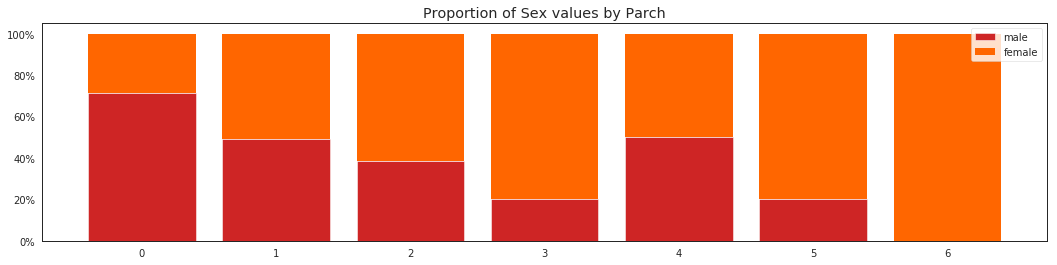

In [199]:
plot_sex_variable(train_df, 'Parch')
chisq(train_df, 'Sex', 'Parch')

Test set:

Chi^2: 25.966346153846153
p-value: 0.0005106898057600867
Degrees of freedom: 7


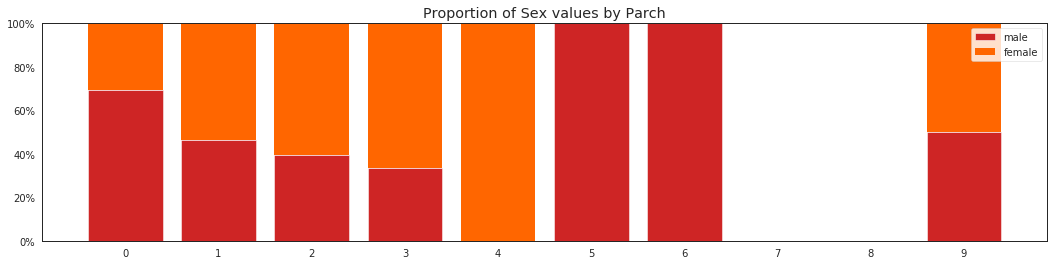

In [200]:
plot_sex_variable(test_df, 'Parch')
chisq(test_df, 'Sex', 'Parch')

**Conclusion:** `Sex` and `Parch` are considered **strongly dependent** both on the train set and test set.

#### Sex vs SibSp
Train set:

Chi^2: 43.7435045823129
p-value: 8.310305033116632e-08
Degrees of freedom: 6


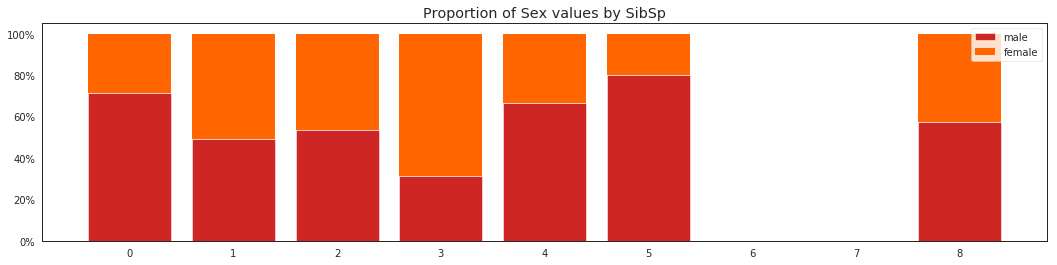

In [201]:
plot_sex_variable(train_df, 'SibSp')
chisq(train_df, 'Sex', 'SibSp')

Test set:

Chi^2: 13.706490228600273
p-value: 0.033092313600883064
Degrees of freedom: 6


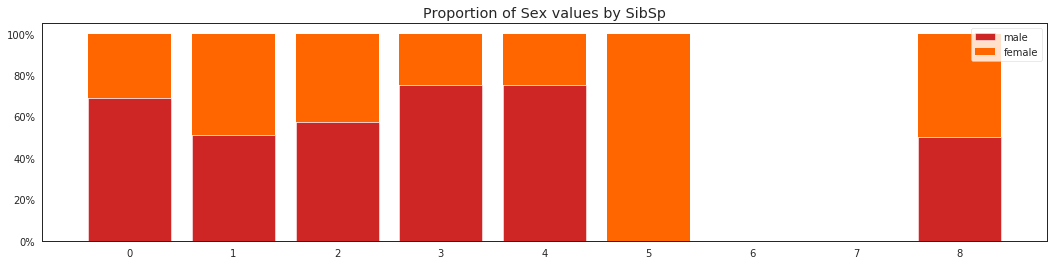

In [202]:
plot_sex_variable(test_df, 'SibSp')
chisq(test_df, 'Sex', 'SibSp')

**Conclusion:** `Sex` and `SibSp` are considered **strongly dependent** both on the train set and test set.

#### Sex vs Pclass
Train set:

Chi^2: 16.971499095517114
p-value: 0.00020638864348233114
Degrees of freedom: 2


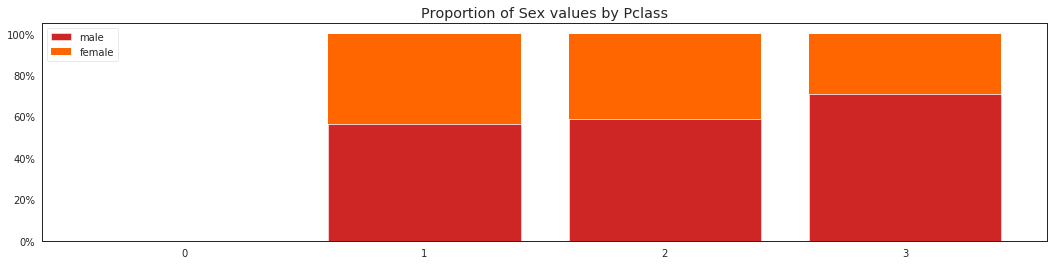

In [203]:
plot_sex_variable(train_df, 'Pclass')
chisq(train_df, 'Sex', 'Pclass')

Test set:

Chi^2: 6.693869422819263
p-value: 0.035192062765906036
Degrees of freedom: 2


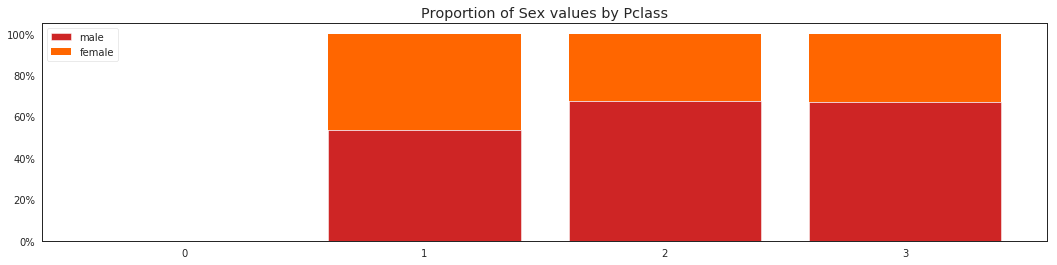

In [204]:
plot_sex_variable(test_df, 'Pclass')
chisq(test_df, 'Sex', 'Pclass')

**Conclusion:** `Sex` and `Pclass` are considered **strongly dependent** both on the train set and test set.

#### Pclass vs Age

Text(0.5,1,'Test set')

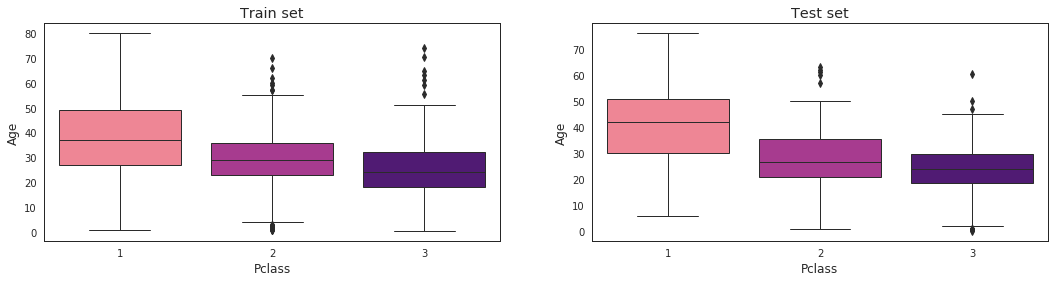

In [205]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(y='Age', x='Pclass', ax=ax1, data=train_df, linewidth=1, saturation=5, palette=palette3)
ax1.set_title('Train set')
sns.boxplot(y='Age', x='Pclass', ax=ax2, data=test_df, linewidth=1, saturation=5, palette=palette3)
ax2.set_title('Test set')

In [206]:
train_esq_sm = compute_anova(train_df, 'Age', 'Pclass')
test_esq_sm = compute_anova(test_df, 'Age', 'Pclass')

print('ANOVA 1-way for the train set: ', train_esq_sm)
print('ANOVA 1-way for the test set: ', test_esq_sm)

ANOVA 1-way for the train set:  0.13632785038577447
ANOVA 1-way for the test set:  0.24220449875087777


For the **train set**, the effect of `Pclass` on `Age` is **medium/high** (0.1363).

For the **test set**, the effect of `Pclass` on `Age` is **high** (0.2422).

**Conclusion:** the effect of `Pclass` on `Age` differs for about **11%** between the two sets.

#### Pclass vs Fare

Text(0.5,1,'Test set')

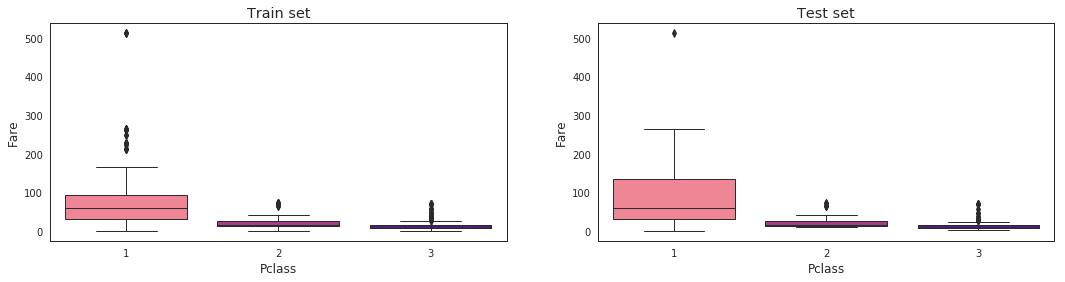

In [207]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(y='Fare', x='Pclass', ax=ax1, data=train_df, linewidth=1, saturation=5, palette=palette3)
ax1.set_title('Train set')
sns.boxplot(y='Fare', x='Pclass', ax=ax2, data=test_df, linewidth=1, saturation=5, palette=palette3)
ax2.set_title('Test set')

In [208]:
train_esq_sm = compute_anova(train_df, 'Fare', 'Pclass')
test_esq_sm = compute_anova(test_df, 'Fare', 'Pclass')

print('ANOVA 1-way for the train set: ', train_esq_sm)
print('ANOVA 1-way for the test set: ', test_esq_sm)

ANOVA 1-way for the train set:  0.30194983231849926
ANOVA 1-way for the test set:  0.3330990201369459


For the **train set**, the effect of `Pclass` on `Fare` is **high** (0.3019).

For the **test set**, the effect of `Pclass` on `Fare` is **high** (0.3331).

**Conclusion:** the effect of `Pclass` on `Age` differs for about **3%** between the two sets.

#### Pclass vs Parch
Let's first write a quick function to plot the proportion of `Pclass` by another discrete variable.

In [209]:
def plot_pclass_variable(dataset, variable):
    """
        Plots the proportion of variable values per Pclass value of a dataset.
        
        :param dataset: pandas DataFrame
        :param variable: variable to plot
    """
    first_variable_index = dataset.groupby(['Pclass', variable]).size()[1].index.values
    second_variable_index = dataset.groupby(['Pclass', variable]).size()[2].index.values
    third_variable_index = dataset.groupby(['Pclass', variable]).size()[3].index.values

    index = list(set().union(first_variable_index, second_variable_index, third_variable_index))

    raw_first_variable = dataset.groupby(['Pclass', variable]).size()[1]
    raw_second_variable = dataset.groupby(['Pclass', variable]).size()[2]
    raw_third_variable = dataset.groupby(['Pclass', variable]).size()[3]

    first_variable = []
    second_variable = []
    third_variable = []

    for i in range(max(index) + 1):
        first_variable.append(raw_first_variable[i] if i in first_variable_index else 0)
        second_variable.append(raw_second_variable[i] if i in second_variable_index else 0)
        third_variable.append(raw_third_variable[i] if i in third_variable_index else 0)

    percent_first_variable = [first_variable[i]/(first_variable[i] + second_variable[i] + third_variable[i]) if i in index else 0 for i in range(max(index) + 1)]
    percent_second_variable = [second_variable[i]/(first_variable[i] + second_variable[i] + third_variable[i]) if i in index else 0 for i in range(max(index) + 1)]
    percent_third_variable = [third_variable[i]/(first_variable[i] + second_variable[i] + third_variable[i]) if i in index else 0 for i in range(max(index) + 1)]

    r = list(range(max(index) + 1))

    fig, axs = plt.subplots(1,1,figsize=(18,4))
    plt.bar(r, percent_first_variable, color='#264e86')
    plt.bar(r, percent_second_variable, bottom=percent_first_variable, linewidth=0, color='#0074e4')
    plt.bar(r, percent_third_variable, bottom=percent_second_variable, linewidth=0, color='#74dbef')
    plt.xticks(r, r)
    plt.title('Proportion of Pclass values by ' + variable)
    axs.legend(labels=['1', '2', '3'])
    axs.yaxis.set_major_formatter(PercentFormatter(xmax=1))

Train set:

Chi^2: 12.87029154531188
p-value: 0.3785385773048016
Degrees of freedom: 12


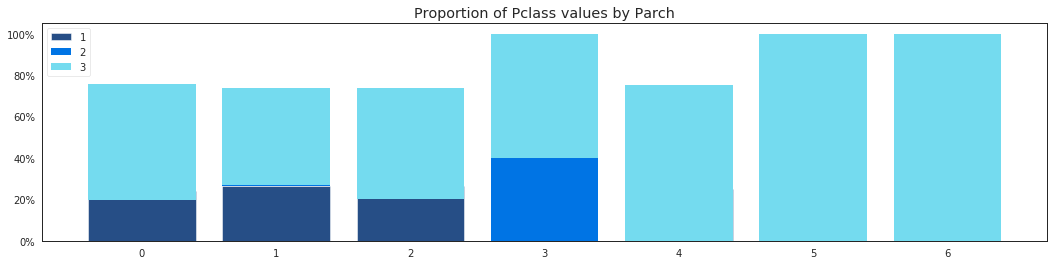

In [210]:
plot_pclass_variable(train_df, 'Parch')
chisq(train_df, 'Pclass', 'Parch')

Test set:

Chi^2: 13.117079849946355
p-value: 0.5173260508098512
Degrees of freedom: 14


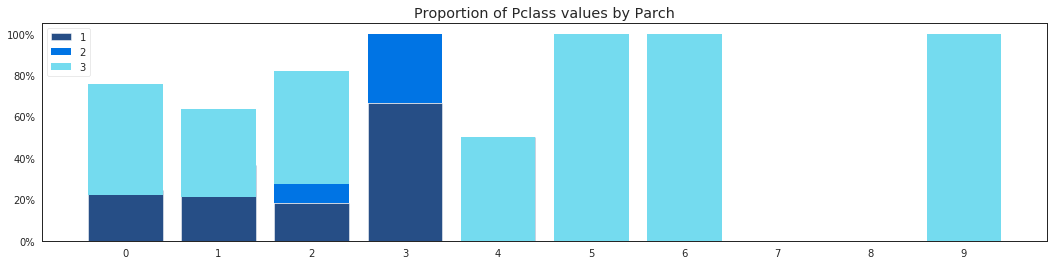

In [211]:
plot_pclass_variable(test_df, 'Parch')
chisq(test_df, 'Pclass', 'Parch')

We can witness very different distributions when `Parch` is equal to 3 between both sets.

**Conclusion**: `Pclass` and `Parch` are considered **strongly dependent** both on the train set and test set.

#### Pclass vs SibSp
Train set:

Chi^2: 50.86189176663683
p-value: 9.85235028800142e-07
Degrees of freedom: 12


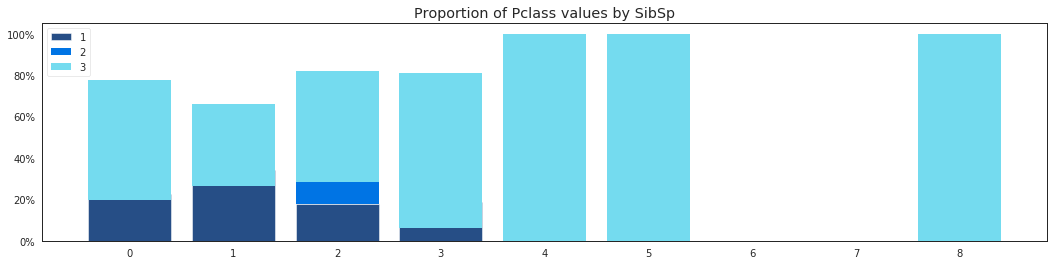

In [212]:
plot_pclass_variable(train_df, 'SibSp')
chisq(train_df, 'Pclass', 'SibSp')

Test set:

Chi^2: 22.67267520610682
p-value: 0.030636905893842045
Degrees of freedom: 12


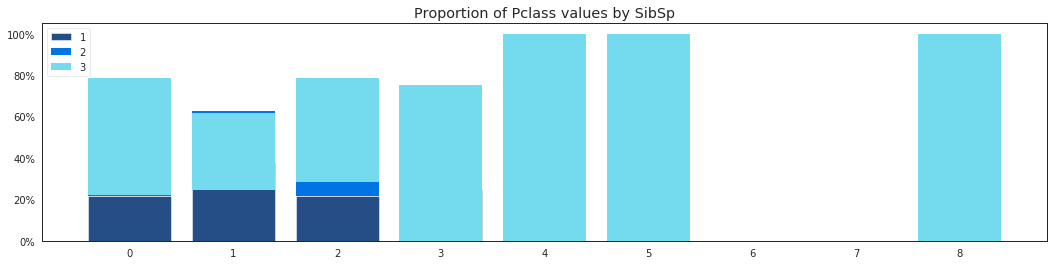

In [213]:
plot_pclass_variable(test_df, 'SibSp')
chisq(test_df, 'Pclass', 'SibSp')

**Conclusion:** contrary to `Parch` which is strongly linearly correlated to `SibSp`, `Pclass` and `SibSp` **are not** considered dependent both on the train set and test set.

## Step 4: Preparing the data for consumption <a id="step4"></a>
We will proceed with **outliers elimination** and **feature engineering**.
### 4.1 Outliers elimination
Outliers are usually bad for model generalization, let's drop a 1% ratio with the **Isolation Forest** algorithm on `Age`, `Fare`, `Parch`, `SibSp`. For more details on the algorithm, feel free to read the original paper: https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf.

In [214]:
X_train = train_df[['Age', 'Fare', 'Parch', 'SibSp']].copy(deep=True).dropna()

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X_train)

clf = ensemble.IsolationForest(contamination=0.01)
clf.fit(X_scaled)
y_pred = clf.predict(X_scaled)

X_train['isOutlier'] = y_pred

outliers_list = X_train.index[X_train['isOutlier'] == -1].tolist()

data_df.drop(outliers_list, inplace=True)
train_df.drop(outliers_list, inplace=True)

TRAINING_LENGTH = len(train_df)

#### Deleted outliers (1% ratio)

In [215]:
X_train[X_train['isOutlier'] == -1]

,Age,Fare,Parch,SibSp,isOutlier
PassengerId,,,,,
28,19.0,263.0000,2,3,-1
89,23.0,263.0000,2,3,-1
259,35.0,512.3292,0,0,-1
342,24.0,263.0000,2,3,-1
439,64.0,263.0000,4,1,-1
679,43.0,46.9000,6,1,-1
680,36.0,512.3292,1,0,-1
738,35.0,512.3292,0,0,-1


### 4.2. Feature engineering
Let's now create and transform existing features to have stable distributions between both sets.
### Sex
#### Mapping Sex
The `Sex` feature can't be used as is, it has to be mapped to a boolean feature. Let's quickly map the values.

In [216]:
data_df['Sex'].replace(['male', 'female'], [0,1], inplace=True)

### Fare
#### Guessing Fare
We will see this below in greater detail but there is a missing value for `Fare`.
Let's quickly fill this value with the median.

In [217]:
data_df['Fare'].fillna(data_df['Fare'].median(), inplace=True)

#### Reducing Fare skewness

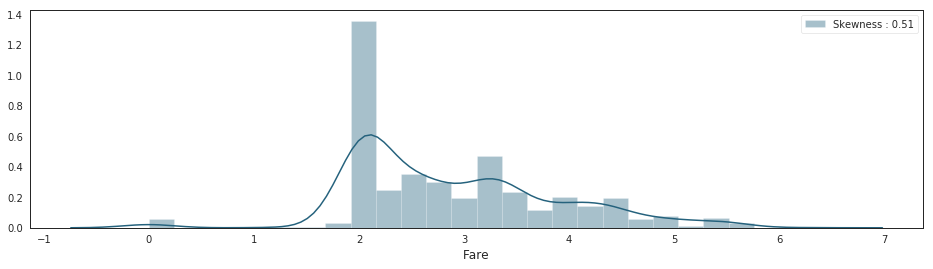

In [218]:
# Apply log to Fare to reduce skewness distribution
data_df["Fare"] = data_df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

fig, ax = plt.subplots(figsize=(16,4))
g = sns.distplot(data_df["Fare"], ax=ax, color='#25627D', label="Skewness : %.2f"%(data_df["Fare"].skew()))
g = g.legend(loc="best")

#### Making Fare bins
To help our model better generalize, it often helps to use bins rather than raw values. Let's make `Fare` bins.

In [219]:
data_df['FareBin'] = pd.qcut(data_df['Fare'], 6)

label = LabelEncoder()
data_df['FareBin_Code'] = label.fit_transform(data_df['FareBin'])

data_df.drop(['Fare'], 1, inplace=True)
data_df.drop(['FareBin'], 1, inplace=True)

Let's see if we reduced the divergence between both sets.

In [220]:
train_df = data_df[:TRAINING_LENGTH]
test_df = data_df[TRAINING_LENGTH:]

logfare_jsd = JSD(train_df['FareBin_Code'].dropna().values, test_df['FareBin_Code'].dropna().values)
print('Jensen-Shannon divergence of Fare:', np.mean(logfare_jsd))
print('Standard deviation:', np.std(logfare_jsd))

Jensen-Shannon divergence of Fare: 0.18205995091671928
Standard deviation: 0.008378045864108532


Text(0.5,1,'Jensen-Shannon divergences of Fare and LogFare')

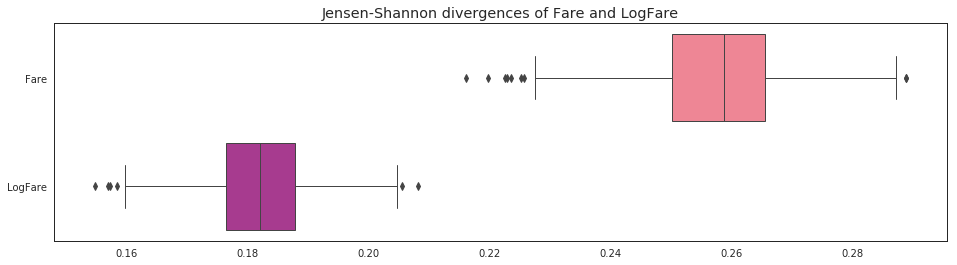

In [221]:
fig, ax = plt.subplots(figsize=(16,4))
jsd = pd.DataFrame(np.column_stack([fare_jsd, logfare_jsd]), columns=['Fare', 'LogFare'])
sns.boxplot(data=jsd, ax=ax, orient="h", linewidth=1, saturation=5, palette=palette2)
ax.set_title('Jensen-Shannon divergences of Fare and LogFare')

Great, we **reduced the divergence** between the train set and the test set a bit, making it a more consistent feature.

### Ticket
#### Extracting the prefix
Ticket's numbers may have a prefix that could be an indicator of the booking process (tied to wealth) and/or location on the boat. Let's extract it.

In [222]:
Ticket = []
for i in data_df['Ticket'].values:
    if not i.isdigit() :
        Ticket.append(i.replace('.', '').replace('', '').strip().split()[0])
    else:
        Ticket.append('X')
        
data_df['Ticket'] = Ticket

#### Getting Ticket dummy variables

In [223]:
data_df = pd.get_dummies(data_df, columns=['Ticket'], drop_first=True)

### Title
#### Creating Title
A feature that often helps categorize in this problem is `Title` derived from `Name`.

In [224]:
# Get Title from Name
titles = [i.split(',')[1].split('.')[0].strip() for i in data_df['Name']]
data_df['Title'] = pd.Series(titles, index=data_df.index)

rare_titles = pd.Series(titles).value_counts()
rare_titles = rare_titles[rare_titles < 10].index

data_df['Title'] = data_df['Title'].replace(rare_titles, 'Rare')
data_df['Title'] = data_df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})
data_df['Title'] = data_df['Title'].astype(int)

#### Getting Title dummy variables
Great, the feature shows some discrimination. It is not ordinal though, lets create dummy variables out of it. (we only need `k-1` columns)

In [225]:
data_df = pd.get_dummies(data_df, columns=['Title'], drop_first=True)

### Family_Size
#### Creating Family_Size
Finally we are combining `Parch` and `SibSp`: `Family_Size = Parch + SibSp + 1`.

In [226]:
data_df['Family_Size'] = data_df['Parch'] + data_df['SibSp'] + 1

In [227]:
tmp_train_df = data_df[:TRAINING_LENGTH].copy(deep=True)
tmp_test_df = data_df[TRAINING_LENGTH:].copy(deep=True)

fs_jsd = JSD(tmp_train_df['Family_Size'].dropna().values, tmp_test_df['Family_Size'].dropna().values)
print('Jensen-Shannon divergence of Family_Size:', np.mean(fs_jsd))
print('Standard deviation:', np.std(fs_jsd))

Jensen-Shannon divergence of Family_Size: 0.10591702399852145
Standard deviation: 0.005097770111571947


Text(0.5,1,'Jensen-Shannon divergences of Parch, SibSp and Family_Size')

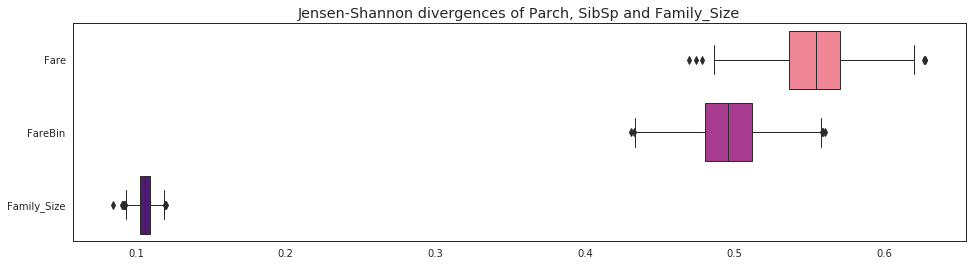

In [228]:
fig, ax = plt.subplots(figsize=(16,4))
jsd = pd.DataFrame(np.column_stack([parch_jsd, sibsp_jsd, fs_jsd]), columns=['Fare', 'FareBin', 'Family_Size'])
sns.boxplot(data=jsd, ax=ax, orient="h", linewidth=1, saturation=5, palette=palette3)
ax.set_title('Jensen-Shannon divergences of Parch, SibSp and Family_Size')

Great, we **reduced the divergence** between the train set and the test set a bit, making it a more consistent feature. We didn't lose much information as we are adding two linearly correlated features.

### Missing values
Let's first have a quick look at missing values in the datasets:

In [229]:
print('Train dataset:')
train_df.isnull().sum().to_frame('Missing values').transpose()

Train dataset:


,Age,Cabin,Embarked,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,FareBin_Code
Missing values,177,685,2,0,0,0,0,0,0,0,0


In [230]:
print('Test/Validation dataset:')
test_df.isnull().sum().to_frame('Missing values').transpose()

Test/Validation dataset:


,Age,Cabin,Embarked,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,FareBin_Code
Missing values,86,327,0,0,0,0,0,0,418,0,0


#### Dropping Name, Parch, SibSp
Let's drop those features:
* `Name`: was used to create the `Title` feature
* `Parch`: was used to create the `Family_Size` feature
* `SibSp`: was used to create the `Family_Size` feature

In [231]:
data_df.drop(['Name', 'Parch', 'SibSp'], axis = 1, inplace = True)

### Embarked
#### Filling Embarked
For 2 missing values, let's fill `Embarked` with the most frequent value.

In [232]:
data_df['Embarked'].fillna(data_df['Embarked'].mode()[0], inplace=True)

#### Getting Embarked dummy variables

In [233]:
data_df = pd.get_dummies(data_df, columns=['Embarked'], drop_first=True)

### Deck
#### Creating Deck
There are a lot of missing values for the `Cabin` feature. This can be explained as some passengers didn't even have a cabin. Let's fill `NaN` values with `X` and extract the deck (letter) as it could indicate the location of the passenger's cabin on the boat.

In [234]:
data_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in data_df['Cabin'] ])

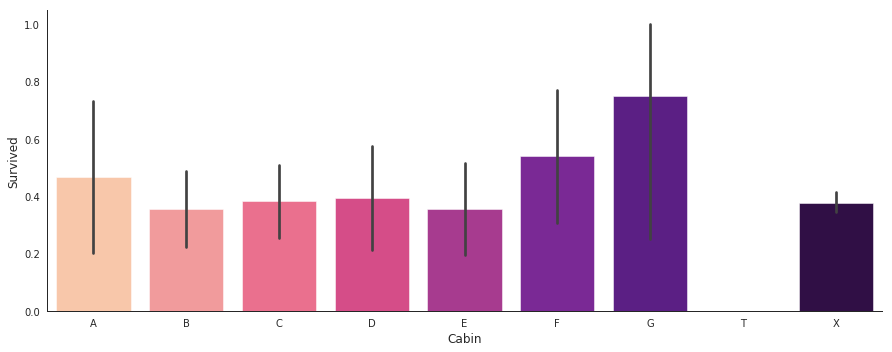

In [235]:
palette9 = ["#F8C7AA", "#F19B9C", "#EA708E", "#D54D88", "#A73B8F", "#7A2995", "#5B1F84", "#451764", "#300F45"]
g = sns.catplot(x='Cabin', y='Survived',saturation=5, aspect=2.5, data=data_df, kind='bar', order=['A','B','C','D','E','F','G','T','X'], palette=palette9)

#### Getting Deck dummy variables

In [236]:
data_df = pd.get_dummies(data_df, columns=['Cabin'], prefix='Deck', drop_first=True)

### Age
#### Guessing the Age
The `Age` feature has quite a lot of missing values but it is still manageable. It can easily be completed with the median value (remember, not the mean) but we will rather predict those values with a **MICE imputer** so that it better fits the distributions of the other features.

**Side note:** for some reason it appears that the MICE imputer was removed from `sklearn 0.20`, weird.

In [237]:
tmp_data_df = data_df.copy(deep = True)[['Age']]

imp = SimpleImputer(missing_values=np.nan, strategy='median')
tmp_data_df = pd.DataFrame(data=imp.fit_transform(tmp_data_df),index=tmp_data_df.index.values,columns=tmp_data_df.columns.values)

#### Making Age bins

In [238]:
tmp_data_df['AgeBin'] = pd.qcut(tmp_data_df['Age'], 5, duplicates='drop')
tmp_data_df['AgeBin'].replace(np.NaN, -1, inplace = True)

label = LabelEncoder()
tmp_data_df['AgeBin_Code'] = label.fit_transform(tmp_data_df['AgeBin'])
tmp_data_df.drop(['Age', 'AgeBin'], axis=1, inplace=True)

data_df['AgeBin_Code'] = tmp_data_df['AgeBin_Code']
data_df.drop(['Age'], 1, inplace=True)

Let's then compare the 3 most important features.

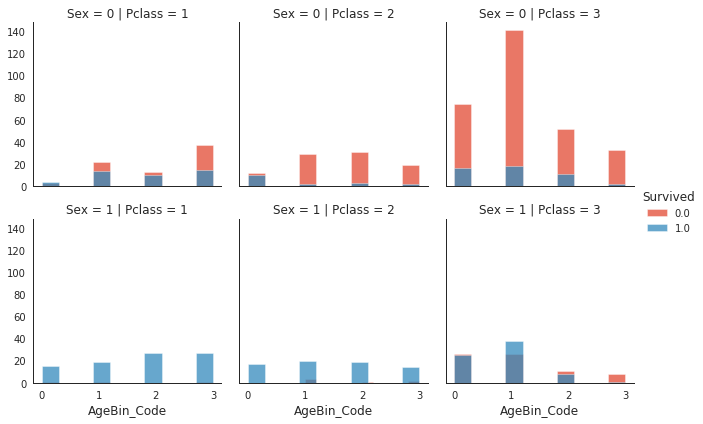

In [239]:
# Histogram comparison of Sex, Pclass, and Age by Survival
h = sns.FacetGrid(data_df, row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'AgeBin_Code', alpha=.75)
h.add_legend()

### A glance at our dataset

In [240]:
train_df = data_df[:TRAINING_LENGTH]
train_df.Survived = train_df.Survived.astype(int)
test_df = data_df[TRAINING_LENGTH:]

In [241]:
train_df.sample(5)

,Pclass,Sex,Survived,FareBin_Code,Ticket_A/4,Ticket_A/5,Ticket_A/S,Ticket_A4,Ticket_A5,Ticket_AQ/3,Ticket_AQ/4,Ticket_C,Ticket_CA,Ticket_CA/SOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_P/PP,Ticket_PC,Ticket_PP,Ticket_SC,Ticket_SC/A3,Ticket_SC/A4,Ticket_SC/AH,Ticket_SC/PARIS,Ticket_SC/Paris,Ticket_SCO/W,Ticket_SO/C,Ticket_SO/PP,Ticket_SOC,Ticket_SOP,Ticket_SOTON/O2,Ticket_SOTON/OQ,Ticket_SP,Ticket_STON/O,Ticket_STON/O2,Ticket_STON/OQ,Ticket_SW/PP,Ticket_W/C,Ticket_WE/P,Ticket_WEP,Ticket_X,Title_1,Title_2,Title_3,Title_4,Family_Size,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X,AgeBin_Code
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
455,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
276,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,0,1,0,0,0,0,0,0,0,1,3
381,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3
271,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
590,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1


### 4.2. Data formatting

Let's create our `X` and `y` and scale them.

In [242]:
X = train_df.drop('Survived', 1)
y = train_df['Survived']
X_test = test_df.copy().drop(columns=['Survived'], axis=1)

In [243]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

## Step 5: Modeling the data <a id="step5"></a>
### 5.1. Model performance with Cross-Validation (CV)
Let's quickly compare several classification algorithms with default parameters from `scikit-learn`, `xgboost`, `lightgbm` and `catboost` through cross-validation.

In [244]:
class CatBoostClassifierCorrected(CatBoostClassifier):
    def fit(self, X, y=None, cat_features=None, sample_weight=None, baseline=None, use_best_model=None, 
            eval_set=None, verbose=None, logging_level=None, plot=False, column_description=None, verbose_eval=None, 
            metric_period=None, silent=None, early_stopping_rounds=None, save_snapshot=None, snapshot_file=None, snapshot_interval=None):
        # Handle different types of label
        self.le_ = LabelEncoder().fit(y)
        transformed_y = self.le_.transform(y)

        self._fit(X=X, y=transformed_y, cat_features=cat_features, pairs=None, sample_weight=sample_weight, group_id=None,
                  group_weight=None, subgroup_id=None, pairs_weight=None, baseline=baseline, use_best_model=use_best_model, 
                  eval_set=eval_set, verbose=verbose, logging_level=logging_level, plot=plot, column_description=column_description,
                  verbose_eval=verbose_eval, metric_period=metric_period, silent=silent, early_stopping_rounds=early_stopping_rounds,
                  save_snapshot=save_snapshot, snapshot_file=snapshot_file, snapshot_interval=None)
        return self
        
    def predict(self, data, prediction_type='Class', ntree_start=0, ntree_end=0, thread_count=1, verbose=None):
        predictions = self._predict(data, prediction_type, ntree_start, ntree_end, thread_count, verbose)

        # Return same type as input
        return self.le_.inverse_transform(predictions.astype(np.int64))

In [245]:
# Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    # Ensemble Methods
    ensemble.RandomForestClassifier(),
    
    # Nearest Neighbors
    neighbors.KNeighborsClassifier(),
    
    # XGBoost
    XGBClassifier(),
    
    # LightGBM
    lgb.LGBMClassifier(),
    
    # CatBoost
    CatBoostClassifierCorrected(iterations=100, logging_level='Silent')
    ]

# Split dataset in cross-validation with this splitter class
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0)

# Create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

# Create table to compare MLA predictions
MLA_predict = pd.Series()

# Index through MLA and save performance to table
row_index = 0
for alg in MLA:

    # Set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # Score model with cross validation
    cv_results = model_selection.cross_validate(alg, X, y, cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    # If this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    
    # Save MLA predictions - see section 6 for usage
    alg.fit(X, y)
    MLA_predict[MLA_name] = alg.predict(X)
    
    row_index+=1
    
# Print and sort table
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,CatBoostClassifierCorrected,"{'logging_level': 'Silent', 'loss_function': '...",0.862004,0.828679,0.056649,0.609685
2,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.860681,0.821887,0.0500679,0.0873872
3,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.889036,0.809434,0.0758153,0.0412503
0,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.928355,0.797736,0.0355118,0.0129951
1,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.833459,0.766415,0.0409586,0.002175


Text(0,0.5,'Algorithm')

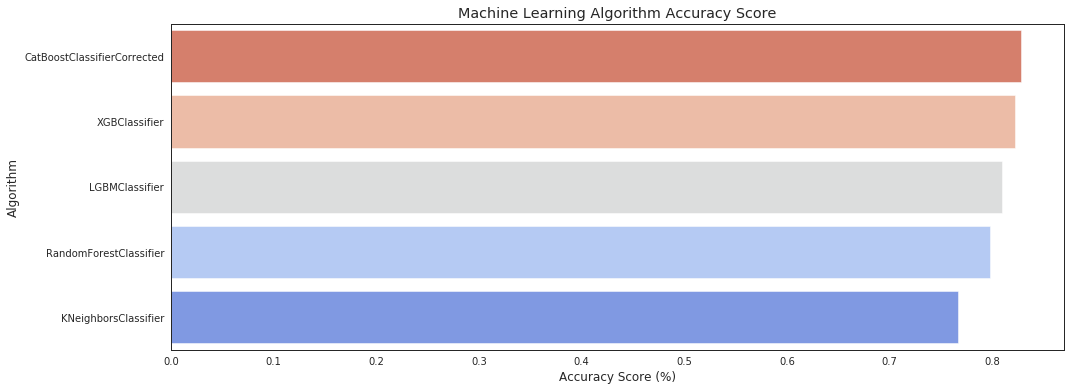

In [246]:
fig, ax = plt.subplots(figsize=(16,6))

# Barplot
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', ax=ax, data=MLA_compare, palette=sns.color_palette("coolwarm_r", 5))

# Prettify
plt.title('Machine Learning Algorithm Accuracy Score')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

So as we can see, the first models are pretty similar in terms of **accuracy**.

### 5.2. Tune the model with ensemble methods

Let's try to leverage ensemble methods to maximize accuracy on the test set.

Let's try two ensemble methods:
* **hard voting**: classification is the most frequent answer
* **soft voting**: classification is based on the argmax of the sums of the predicted probabilities

In [247]:
# Removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
vote_est = [
    # Ensemble Methods: 
    ('rfc', ensemble.RandomForestClassifier()),
    
    # Nearest Neighbors:
    ('knn', neighbors.KNeighborsClassifier()),
    
    # XGBoost:
    ('xgb', XGBClassifier()),
    
    # LightGBM:
    ('lgb', lgb.LGBMClassifier()),
    
    # CatBoost:
    ('cat', CatBoostClassifierCorrected(iterations=100, logging_level='Silent'))
]

# Hard vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est, voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X, y, cv = cv_split)
vote_hard.fit(X, y)

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*15)

# Soft vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X, y, cv  = cv_split)
vote_soft.fit(X, y)

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*15)

Hard Voting Training w/bin score mean: 88.32
Hard Voting Test w/bin score mean: 82.08
Hard Voting Test w/bin score 3*std: +/- 5.24
---------------
Soft Voting Training w/bin score mean: 89.53
Soft Voting Test w/bin score mean: 82.08
Soft Voting Test w/bin score 3*std: +/- 6.08
---------------


Ok so good results, but there is room for improvement. The reason is we didn't touch any of the hyperparameters of the voting models.

Let's perform grid search on the different classifiers. **(careful, this will take A LOT OF time)**

(everything is set though)

In [248]:
# Hyper-parameter tuning with GridSearchCV:
grid_param = [
            [{
            # RandomForestClassifier
            'criterion': ['gini'], #['gini', 'entropy'],
            'max_depth': [8], #[2, 4, 6, 8, 10, None],
            'n_estimators': [100], #[10, 50, 100, 300],
            'oob_score': [False] #[True, False]
             }],
    
            [{
            # KNeighborsClassifier
            'algorithm': ['auto'], #['auto', 'ball_tree', 'kd_tree', 'brute'],
            'n_neighbors': [7], #[1,2,3,4,5,6,7],
            'weights': ['distance'] #['uniform', 'distance']
            }],
    
            [{
            # XGBClassifier
            'learning_rate': [0.05], #[0.05, 0.1,0.16],
            'max_depth': [10], #[10,30,50],
            'min_child_weight' : [6], #[1,3,6]
            'n_estimators': [200]
             }],
    
            [{
            # LightGBMClassifier
            'learning_rate': [0.01], #[0.01,0.05,0.1],
            'n_estimators': [200],
            'num_leaves': [300], #[300,900,1200],
            'max_depth': [25], #[25,50,75],
             }],
    
            [{
            # CatBoostClassifier
            'depth': [4],
            'learning_rate' : [0.03],
            'l2_leaf_reg': [4],
            'iterations': [300],
            'thread_count': [4]
            }]
        ]

start_total = time.perf_counter()
for clf, param in zip (vote_est, grid_param):
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(X, y)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 

run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*15)

The best parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100, 'oob_score': False} with a runtime of 1.25 seconds.
The best parameter for KNeighborsClassifier is {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'} with a runtime of 0.54 seconds.
The best parameter for XGBClassifier is {'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 200} with a runtime of 3.89 seconds.
The best parameter for LGBMClassifier is {'learning_rate': 0.01, 'max_depth': 25, 'n_estimators': 200, 'num_leaves': 300} with a runtime of 1.05 seconds.
The best parameter for CatBoostClassifierCorrected is {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 4, 'learning_rate': 0.03, 'thread_count': 4} with a runtime of 17.25 seconds.
Total optimization time was 0.40 minutes.
---------------


In [249]:
# Hard vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, X, y, cv  = cv_split)
grid_hard.fit(X, y)

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*15)

# Soft vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, X, y, cv  = cv_split)
grid_soft.fit(X, y)

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*15)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 87.09
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.08
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 6.43
---------------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 90.15
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 81.77
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 7.16
---------------


###  5.2. Submission
Good scores overall, let's prepare the data for submission.

In [250]:
test_df['Survived'] = grid_soft.predict(X_test)
test_df['Survived'] = test_df['Survived'].astype(int)
print('Validation Data Distribution: \n', test_df['Survived'].value_counts(normalize = True))
submit = test_df[['Survived']]
#submit.to_csv("../output/submission.csv", index=True)

Validation Data Distribution: 
 0    0.638756
1    0.361244
Name: Survived, dtype: float64


Wait a minute, **0.79904** accuracy after submission? (still top 14% though)

## Step 6: Drawing conclusions <a id="step6"></a>
It appears that our models capture some distributions from the engineered training dataset that differ slightly in the testing dataset: this is a sign of **overfitting**.

We did use a lot of features from our datasets and generally, if you want to avoid overfitting, **less is better**.  Remember the mapping of $X$ to a different feature space? We discovered through EDA that **the train set and the test set are not equally distributed**. We need a mapping that simplifies the distributions of features that have an influence on survival. And that's why this problem is hard.

### 6.1. Simplifying our datasets

#### Dropping Deck, Embarked and Ticket
Let's drop the most ambiguous features.

In [251]:
columns = [c for c in data_df.columns if 'Deck' in c or 'Embarked' in c or 'Ticket' in c]

simple_data_df = data_df.copy(deep=True)
simple_data_df.drop(columns=columns, axis=1, inplace=True)

#### Simplifying Age
Let's create the `Young`boolean feature telling us if the passenger is young (< 2nd bin).

In [252]:
simple_data_df['Young'] = np.where((simple_data_df['AgeBin_Code']<2), 1, 0)
simple_data_df.drop(columns=['AgeBin_Code'], axis=1, inplace=True)

#### Merging Pclass and Sex
Let's merge `Pclass` and `Sex`.

In [253]:
simple_data_df['P1_Male'] = np.where((simple_data_df['Sex']==0) & (simple_data_df['Pclass']==1), 1, 0)
simple_data_df['P2_Male'] = np.where((simple_data_df['Sex']==0) & (simple_data_df['Pclass']==2), 1, 0)
simple_data_df['P3_Male'] = np.where((simple_data_df['Sex']==0) & (simple_data_df['Pclass']==3), 1, 0)
simple_data_df['P1_Female'] = np.where((simple_data_df['Sex']==1) & (simple_data_df['Pclass']==1), 1, 0)
simple_data_df['P2_Female'] = np.where((simple_data_df['Sex']==1) & (simple_data_df['Pclass']==2), 1, 0)
simple_data_df['P3_Female'] = np.where((simple_data_df['Sex']==1) & (simple_data_df['Pclass']==3), 1, 0)

simple_data_df.drop(columns=['Pclass', 'Sex'], axis=1, inplace=True)

In [254]:
simple_train_df = simple_data_df[:TRAINING_LENGTH]
simple_test_df = simple_data_df[TRAINING_LENGTH:]

simple_data_df.sample(5)

,Survived,FareBin_Code,Title_1,Title_2,Title_3,Title_4,Family_Size,Young,P1_Male,P2_Male,P3_Male,P1_Female,P2_Female,P3_Female
PassengerId,,,,,,,,,,,,,,
1095,NaN,3,1,0,0,0,3,1,0,0,0,0,1,0
341,1.0,3,0,0,1,0,3,1,0,1,0,0,0,0
230,0.0,3,1,0,0,0,5,1,0,0,0,0,0,1
414,0.0,0,0,0,0,0,1,1,0,1,0,0,0,0
1115,NaN,1,0,0,0,0,1,1,0,0,1,0,0,0


### 6.2. Data formatting
Let's create our `X` and `y` and scale them.

In [255]:
X = simple_train_df.drop('Survived', 1)
y = simple_train_df['Survived']
X_test = simple_test_df.copy().drop(columns=['Survived'], axis=1)

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

### 6.3. Hyper-parameter tuning and ensemble methods
Let's try to leverage ensemble methods to maximize accuracy on the test set.

In [256]:
# Hyper-parameter tuning with GridSearchCV:
grid_param = [
            [{
            # RandomForestClassifier
            'criterion': ['gini'], #['gini', 'entropy'],
            'max_depth': [8], #[2, 4, 6, 8, 10, None],
            'n_estimators': [100], #[10, 50, 100, 300],
            'oob_score': [False] #[True, False]
             }],
    
            [{
            # KNeighborsClassifier
            'algorithm': ['auto'], #['auto', 'ball_tree', 'kd_tree', 'brute'],
            'n_neighbors': [7], #[1,2,3,4,5,6,7],
            'weights': ['distance'] #['uniform', 'distance']
            }],
    
            [{
            # XGBClassifier
            'learning_rate': [0.05], #[0.05, 0.1,0.16],
            'max_depth': [10], #[10,30,50],
            'min_child_weight' : [6], #[1,3,6]
            'n_estimators': [200]
             }],
    
            [{
            # LightGBMClassifier
            'learning_rate': [0.01], #[0.01,0.05,0.1],
            'n_estimators': [200],
            'num_leaves': [300], #[300,900,1200],
            'max_depth': [25], #[25,50,75],
             }],
    
            [{
            # CatBoostClassifier
            'depth': [4],
            'learning_rate' : [0.03],
            'l2_leaf_reg': [4],
            'iterations': [300],
            'thread_count': [4]
            }]
        ]

start_total = time.perf_counter()
for clf, param in zip (vote_est, grid_param):
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(X, y)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 

run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*15)

The best parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100, 'oob_score': False} with a runtime of 1.08 seconds.
The best parameter for KNeighborsClassifier is {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'} with a runtime of 0.13 seconds.
The best parameter for XGBClassifier is {'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 200} with a runtime of 1.47 seconds.
The best parameter for LGBMClassifier is {'learning_rate': 0.01, 'max_depth': 25, 'n_estimators': 200, 'num_leaves': 300} with a runtime of 0.90 seconds.
The best parameter for CatBoostClassifierCorrected is {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 4, 'learning_rate': 0.03, 'thread_count': 4} with a runtime of 15.36 seconds.
Total optimization time was 0.32 minutes.
---------------


In [257]:
# Hard vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, X, y, cv  = cv_split)
grid_hard.fit(X, y)

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*15)

# Soft vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, X, y, cv  = cv_split)
grid_soft.fit(X, y)

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*15)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 85.61
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.49
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.84
---------------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 86.43
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.49
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 6.41
---------------


### 6.4. Submission
Ok, let's prepare the data for submission.

In [258]:
simple_test_df['Survived'] = grid_soft.predict(X_test)
simple_test_df['Survived'] = test_df['Survived'].astype(int)
print('Validation Data Distribution: \n', simple_test_df['Survived'].value_counts(normalize = True))
submit = simple_test_df[['Survived']]
#submit.to_csv("../output/submission.csv", index=True)

Validation Data Distribution: 
 0    0.638756
1    0.361244
Name: Survived, dtype: float64


## Changelog
v1: initial submission.

*This is a work in progress. Comments and critical feedback are always welcome.*